# Music Genre Classification from Audio Features
_Mudassir Imam, Juan Leonhardt, Yu Wang_

# Abstract

_This project explores music genre classification using audio features. We leverage a dataset of 114,000 Spotify tracks spanning 114 genres, consolidated through hierarchical clustering into 56 distinct classes. Four models were developed: a neural network, an XGBoost model, a K-Nearest Neighbors (KNN) classifier, and an ensemble model composed of 4 weak learners. All models predict the probability of a song belonging to each genre._

_Top-3 categorical accuracy was chosen as the primary evaluation metric due to the inherent ambiguity of music genre. The XGBoost model achieved the highest Top-3 accuracy (73.74%) followed by the neural network (69.54%). While both models deliver strong performance, they are computationally expensive to train. The KNN classifier offered a balance, demonstrating respectable Top-3 accuracy (70.36%) with significantly faster training times. Notably, the gap between Top-3 and standard accuracy for KNN suggests its strength in suggesting relevant genres within its top predictions._

_The study concludes that certain genres are inherently easier to classify due to distinct audio characteristics. This project demonstrates the effectiveness of multi-model approaches in music genre classification, offering insights for future research in genre prediction and music information retrieval systems._

# Introduction

Music genre classification is a challenging problem in the field of music information retrieval. Accurately categorizing songs into their respective genres based solely on audio features is a complex task, as genres can be highly subjective and influenced by various cultural and temporal factors. However, the ability to automatically classify music genres can have significant applications in music recommendation systems, music organization, and understanding listener preferences.
This project aims to explore the effectiveness of machine learning models in predicting music genres from audio features extracted from Spotify tracks. By leveraging a comprehensive dataset of 114,000 tracks spanning 114 genres, collected and cleaned from the Spotify API, we investigate the following research questions:

1. How well can audio features from the Spotify data predict a track's genre?
2. Are there specific genres that are more accurately classified by machine learning models compared to others?

To address these questions, we employ a range of machine learning techniques, including neural networks, XGBoost, K-Nearest Neighbors (KNN), and an ensemble model composed of four weak learners. The models are trained to predict the probability of a song belonging to each of the 56 genres represented in the dataset.
Given the inherent ambiguity in genre classification, we evaluate the performance of the models using the Top-3 Categorical Accuracy metric. This metric considers a prediction as correct if the true genre is among the top three most probable genres predicted by the model, reflecting the subjective nature of genre boundaries.
By investigating the performance of these models on the diverse Spotify dataset, we aim to gain insights into the feasibility and limitations of audio-based genre classification. The findings of this project may contribute to the development of more accurate and robust music recommendation systems, as well as provide a better understanding of the discriminative power of audio features in capturing genre characteristics.

In [1]:
''' We recommend to uncomment and run the follwing line of code in case this necessary library is not already installed in the user's enviroment: '''

# !pip install xgboost

" We recommend to uncomment and run the follwing line of code in case this necessary library is not already installed in the user's enviroment: "

In [2]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace the URL with the direct link to the raw csv file
url = "https://raw.githubusercontent.com/Juanfra21/Data-Science/main/Final-Project/spotify_dataset.csv"

# Load data from the csv file into a pandas DataFrame
df = pd.read_csv(url).iloc[:,1:]

# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Print the table
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


## Function Definition

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import base64
from io import BytesIO
from IPython.display import display, HTML
import tensorflow as tf
from tensorflow import keras

# Numeric EDA plots
def numeric_eda_plots(dataframe, column_name, x_label):
    '''
    Purpose: Generates a histogram and a box plot

    Parameters:
    - dataframe (DataFrame): The input DataFrame containing the data to be plotted.
    - column_name (str): The name of the column in the DataFrame to be plotted.
    - x_label (str): The label for the x-axis.
    '''
    #Define the figure
    fig_1 = plt.figure(1)

    #Adjust the distance between the plots
    plt.subplots_adjust(hspace=0.6)

    ### First plot - Histogram ###
    plt.subplot(211) #Position
    plt.title("Histogram of " + column_name) #Title
    sns.histplot(data = dataframe, x = column_name, kde=True)
    plt.xlabel(x_label);

    ### Second plot - Box plot ###
    plt.subplot(212) #Position
    plt.title("Box plot of " + column_name) #Title
    sns.boxplot(data = dataframe, x = column_name);
    plt.xlabel(x_label);

# Numeric EDA summary
def numeric_eda_summary(dataframe, column_name):
    '''
    Purpose: Generates count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values. 
    
    Parameters:

    - dataframe (DataFrame): The input DataFrame containing the data.
    - column_name (str): The name of the numerical column.
    '''
    return dataframe[column_name].describe()

# Categorical EDA plot
def categorical_eda_plot(dataframe, column_name, plot_title, x_label, y_label):
    '''
    Purpose: Generates a bar plot

    Parameters:
    - dataframe (DataFrame): The input DataFrame containing the data to be plotted.
    - column_name (str): The name of the column in the DataFrame to be plotted.
    - plot_title (str): The title of the plot.
    - x_label (str): The label for the x-axis.
    - y_label (str): The label for the y-axis.
    '''
    # Create a bar plot using Seaborn
    sns.countplot(x=column_name, data=dataframe, edgecolor="black", palette='viridis')

    # Add labels and title
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Rotate x-axis labels by 90 degrees
    plt.xticks(rotation=90);

# Categorical EDA description    
def categorical_eda_summary(dataframe, column_name):
    '''
    Purpose: Generates category name, count of occurrences, and the percentage of total
    
    Parameters:

    - dataframe (DataFrame): The input DataFrame containing the data.
    - column_name (str): The name of the categorical column.
    '''
    summary = dataframe[column_name].value_counts().reset_index()
    summary.columns = ['Category', 'Count']
    summary['Percentage of Total'] = round((summary['Count'] / summary['Count'].sum()) * 100,2)
    return summary

# Recall by genre
def recall_by_genre(y_test, y_pred):
    # Calculate confusion matrix for predicted genre labels
    matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))

    # Calculate recall for each genre (true positives / (true positives + false negatives))
    recall = matrix.diagonal() / matrix.sum(axis=1) * 100

    # Create DataFrame for genre-wise recall
    genre_recall = pd.DataFrame({'recall': recall})
    
    # Create DataFrames for genres and predictions
    genres_labels = pd.DataFrame(genres)
    
    # Label genre & prediction columns for clarity
    genres_labels.columns = ['genre']

    # Combine genre labels & recall, sort by descending recall, reset index
    recall_by_genre = pd.concat([genres_labels, genre_recall], axis=1).sort_values(by='recall', ascending=False).reset_index(drop=True)

    return recall_by_genre

# Precision by genre
def precision_by_genre(y_test, y_pred):
    # Calculate confusion matrix for predicted genre labels
    matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))

    # Calculate precision for each genre (true positives / (true positives + false positives))
    precision = matrix.diagonal() / matrix.sum(axis=0) * 100

    # Create DataFrame for genre-wise precision
    genre_precision = pd.DataFrame({'precision': precision})
    
    # Create DataFrames for genres and predictions
    genres_labels = pd.DataFrame(genres)
    
    # Label genre & prediction columns for clarity
    genres_labels.columns = ['genre']

    # Combine genre labels & precision, sort by descending precision, reset index
    precision_by_genre = pd.concat([genres_labels, genre_precision], axis=1).sort_values(by='precision', ascending=False).reset_index(drop=True)

    return precision_by_genre

# F1 score by genre
def f1_by_genre(y_test, y_pred):
    # Calculate confusion matrix for predicted genre labels
    matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))

    # Calculate precision and recall
    precision = matrix.diagonal() / matrix.sum(axis=0)
    recall = matrix.diagonal() / matrix.sum(axis=1)

    # Calculate F1-score for each genre
    f1_score = 2 * (precision * recall) / (precision + recall) * 100

    # Create DataFrame for genre-wise F1-score
    genre_f1 = pd.DataFrame({'f1_score': f1_score})
    
    # Create DataFrames for genres and predictions
    genres_labels = pd.DataFrame(genres)
    
    # Label genre & prediction columns for clarity
    genres_labels.columns = ['genre']

    # Combine genre labels & F1-score, sort by descending F1-score, reset index
    f1_by_genre = pd.concat([genres_labels, genre_f1], axis=1).sort_values(by='f1_score', ascending=False).reset_index(drop=True)

    return f1_by_genre

# Get percentage of null values by column
def null_values(dataframe):
    '''
    Purpose: Generates a bar chart with the percentage of null values for each column in the dataframe.

    Parameters:
    - dataframe (DataFrame): The input DataFrame containing the data.
    '''
    # Let's show the percentage of missing data values per column
    nan_count_by_column = dataframe.isna().sum()
    total_rows = len(dataframe)

    # Calculate the percentage of NaNs for each column
    nan_percentage_by_column = (nan_count_by_column / total_rows) * 100

    # Plotting with Seaborn
    # plt.figure(figsize=(14, 4))
    sns.barplot(x=nan_percentage_by_column.index, y=nan_percentage_by_column.values, palette="viridis")

    # Adding labels and title
    plt.xlabel("Columns")
    plt.ylabel("Missing data values percentage")
    plt.title("Missing data values percentage by column")

    # Display the percentage values on top of each bar
    for i, value in enumerate(nan_percentage_by_column.values):
        plt.text(i, value + 0.5, f"{value:.0f}%", ha='center', va='bottom', fontsize=8)

    # Set y-axis limits to range from 0 to 100
    plt.ylim(0, 100)   

    # Rotate x-axis labels
    plt.xticks(rotation=90)

    # Display the plot
    plt.show()

# Scrollable barplots
def generate_scrollable_barplot(data_frame, variable, title):
    # Sort the DataFrame by the mean value of the variable
    sorted_df = data_frame.sort_values(by=variable, ascending=False)

    # Create a large-sized plot
    plt.figure(figsize=(20, 6))
    sns.barplot(x=sorted_df.index, y=variable, data=sorted_df)
    plt.xticks(rotation=90)  # Rotate labels for better fit
    plt.title(title)
    plt.xlabel('Genre')
    plt.ylabel(f'Average {variable.capitalize()}')

    # Save the plot as a PNG image and encode the image
    buf = BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight')
    plt.close()
    data = base64.b64encode(buf.getbuffer()).decode("ascii")

    # Create an HTML container with a scrollbar to display the plot
    html_string = f"""
    <div style="overflow-x: scroll; width:1000px; height:400px;">
        <img src='data:image/png;base64,{data}' style='width:2000px; height:auto;'>
    </div>
    """

    # Display the plot with a scrollbar using the HTML function from IPython
    return HTML(html_string)

# Scaling
def perform_scaling(df, columns_to_scale, scaler_type):
    """
    Perform scaling on specified columns of a DataFrame and merge scaled columns back into the original DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - columns_to_scale (list): List of column names to scale.
    - scaler_type (int): 1 for StandardScaler, 2 for MinMaxScaler.

    Returns:
    - df_scaled (pd.DataFrame): DataFrame with scaled columns merged with unscaled columns.
    """
    if scaler_type == 1:
        scaler = StandardScaler()
    elif scaler_type == 2:
        scaler = MinMaxScaler()
    else:
        raise ValueError("Invalid scaler_type. Use 1 for StandardScaler or 2 for MinMaxScaler.")

    scaled_data = scaler.fit_transform(df[columns_to_scale])
    scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
    df_scaled = pd.concat([df.drop(columns=columns_to_scale).reset_index(drop=True), scaled_df], axis=1)

    return df_scaled

# Accuracy by genre
def accuracy_by_genre(y_test, y_pred):
    # Calculate confusion matrix for predicted genre labels
    matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))

    # Calculate genre-wise accuracy as percentage
    matrix_pred = matrix.diagonal()/matrix.sum(axis=1)*100

    # Create DataFrame for genre-wise accuracy
    genre_accuracy = pd.DataFrame({'accuracy': matrix_pred})

    # Create DataFrames for genres and predictions
    genres_labels = pd.DataFrame(genres)
    # predictions = pd.DataFrame(matrix)

    # Label genre & prediction columns for clarity
    genres_labels.columns = ['genre']
    # predictions.columns = genres

    # Combine genre labels & accuracy, sort by descending accuracy, reset index
    accuracy_by_genre = pd.concat([genres_labels, genre_accuracy], axis=1).sort_values(by='accuracy', ascending=False).reset_index(drop=True)

    return accuracy_by_genre

# Top-K accuracy
def top_k_accuracy(y_test, y_pred, k):
    # Calculate top-k categorical accuracy
    top_k_accuracy = tf.keras.metrics.sparse_top_k_categorical_accuracy(y_test, y_pred, k=k)
    top_k_accuracy = round(np.mean(top_k_accuracy)*100,2)

    # Calculate accuracy
    accuracy = tf.keras.metrics.sparse_top_k_categorical_accuracy(y_test, y_pred, k=1)
    accuracy = round(np.mean(accuracy)*100,2)

    print(f"Top-{k} categorical accuracy: {top_k_accuracy}%")
    print(f"Accuracy: {accuracy}%")

# Exploratory Data Analysis

## General EDA

### Data Types

In [4]:
# Display data types of each column
df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

The data for this project comes from a dataset of 114,000 Spotify tracks spanning 114 genres, collected and cleaned by the user "maharshipandya" from the Spotify API using Python. It is available at https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset on Huggingface. The dataset contains various audio features for each track, including danceability, energy, acousticness, instrumentalness, tempo, time signature and more. It also provides metadata like the track name, album, artists, duration, etc:

- **track_id:** The Spotify ID for the track
- **artists:** The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- **album_name:** The album name in which the track appears
- **track_name:** Name of the track
- **popularity:** The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- **duration_ms:** The track length in milliseconds
- **explicit:** Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
- **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- **loudness:** The overall loudness of a track in decibels (dB)
- **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- **time_signature:** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- **track_genre:** The genre in which the track belongs

### Missing Data Values

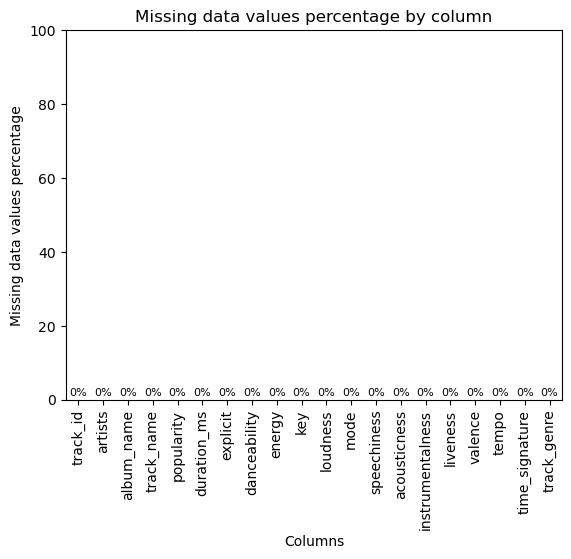

In [5]:
null_values(df)

There are no null values in this dataset

### Duplicated Data

In [6]:
# Check the total number of duplicated rows
df.duplicated().sum()

450

There are 450 duplicated rows in our dataset, which is expected since songs can belong to more than one genre.

## Univariate EDA

### Popularity

In [7]:
numeric_eda_summary(df, "popularity")

count    114000.000000
mean         33.238535
std          22.305078
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64

The data set contains 114,000 samples with a mean of 33.24 and a standard deviation of 22.31, indicating that the data is relatively dispersed. The variable ranges from 0 to 100, with a median of 35 and 75% of values less than or equal to 50.

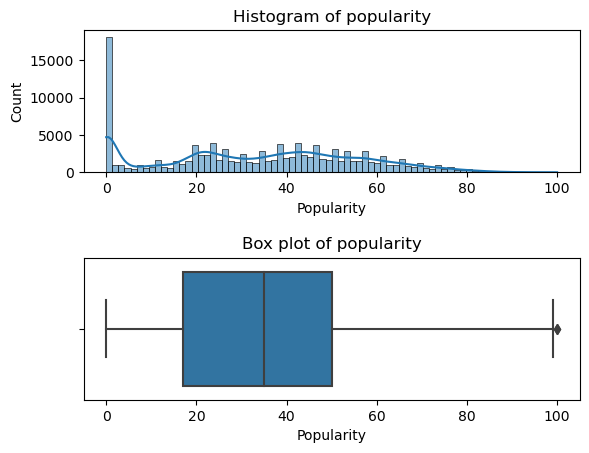

In [8]:
numeric_eda_plots(df, "popularity", "Popularity")

The box plot shows that most of the data is concentrated between 18-50, distributed in the lower range, but there are also some higher values. Except for a lot of 0 values, most of the data is evenly distributed.

### Explicit

In [9]:
categorical_eda_summary(df, "explicit")

,Category,Count,Percentage of Total
0,False,104253,91.45
1,True,9747,8.55


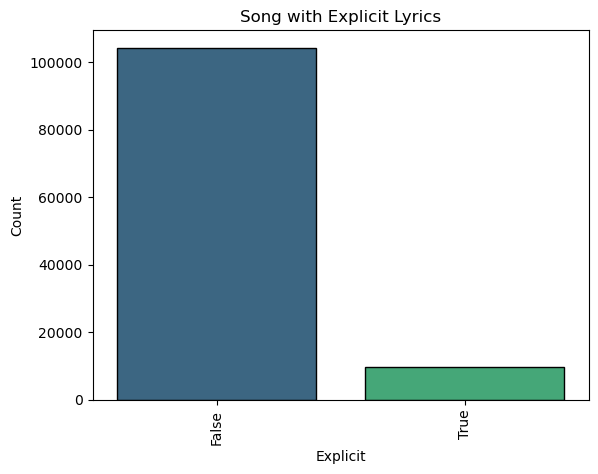

In [10]:
categorical_eda_plot(df, "explicit", "Song with Explicit Lyrics", "Explicit", "Count")

Among them, there are 104,253 samples in the "False" category, accounting for 91.45% of the total, and 9,747 samples in the "True" category, accounting for 8.55% of the total. It can be seen that the number of samples in the "False" category is much more than that in the "True" category.

### Duration_ms

In [11]:
numeric_eda_summary(df, "duration_ms")

count    1.140000e+05
mean     2.280292e+05
std      1.072977e+05
min      0.000000e+00
25%      1.740660e+05
50%      2.129060e+05
75%      2.615060e+05
max      5.237295e+06
Name: duration_ms, dtype: float64

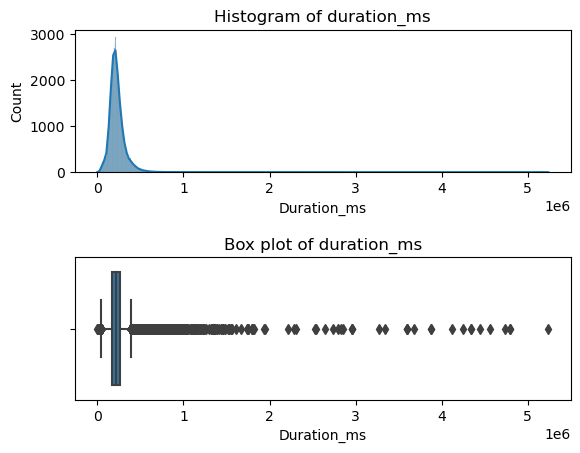

In [12]:
numeric_eda_plots(df, "duration_ms", "Duration_ms")

The average duration is about 228 seconds, with a standard deviation of 107 seconds, showing that there is a range of variation in duration overall. The shortest duration in the data is 0 milliseconds, while the longest duration is 5,237 seconds, indicating a very significant difference in the data set. The duration of the vast majority of samples is distributed between 174 and 261 seconds, with a median of about 213 seconds, showing the central trend of the data. However, there are some outliers, i.e. extremely high durations.

### Danceability

In [13]:
numeric_eda_summary(df, "danceability")

count    114000.000000
mean          0.566800
std           0.173542
min           0.000000
25%           0.456000
50%           0.580000
75%           0.695000
max           0.985000
Name: danceability, dtype: float64

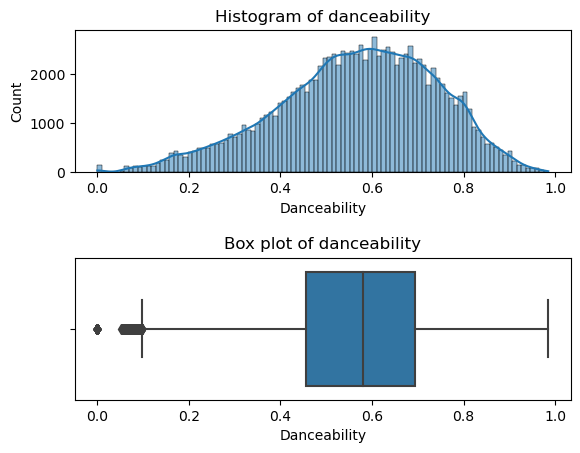

In [14]:
numeric_eda_plots(df, "danceability", "Danceability")

The data describes the statistical characteristics of danceability and contains a total of 114,000 samples. The average danceability score is 0.5668, showing a moderate level of danceability in the data set overall. The standard deviation is 0.1735, indicating that the distribution of danceability scores is relatively concentrated, with most samples scoring around the average level. The danceability score ranges from the lowest value 0 to the highest value 0.985, showing a certain range of change, while the 25%, 50% and 75% quantiles are 0.456, 0.580 and 0.695 respectively, further revealing the overall distribution of the danceability score Condition. Taken together, the data shows an overall trend of more balanced danceability ratings, but there are also some extreme low and high ratings.

### Energy              

In [15]:
numeric_eda_summary(df, "energy")

count    114000.000000
mean          0.641383
std           0.251529
min           0.000000
25%           0.472000
50%           0.685000
75%           0.854000
max           1.000000
Name: energy, dtype: float64

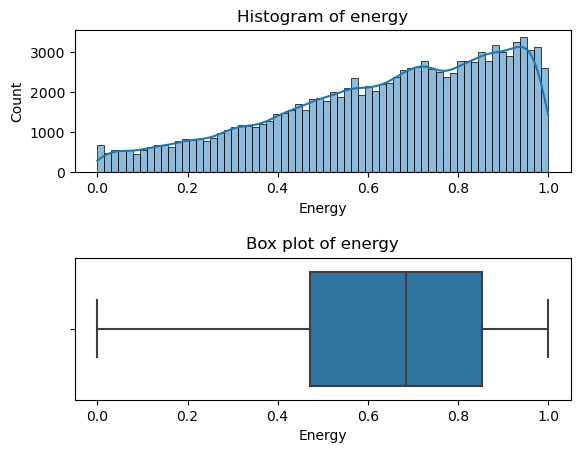

In [16]:
numeric_eda_plots(df, "energy", "Energy")

The average energy level of the data is 0.641, and the standard deviation is 0.252, indicating that the energy level of the data is relatively scattered overall, and the average energy is at a medium level. The minimum energy value is 0 and the maximum energy value is 1, indicating that the data set covers the entire range from the lowest energy to the highest energy. Most samples have moderate to high energy levels, but there are some low and very high energy exceptions.

### Key                   

In [17]:
categorical_eda_summary(df, "key")

,Category,Count,Percentage of Total
0,7,13245,11.62
1,0,13061,11.46
2,2,11644,10.21
3,9,11313,9.92
4,1,10772,9.45
5,5,9368,8.22
6,11,9282,8.14
7,4,9008,7.90
8,6,7921,6.95
9,10,7456,6.54


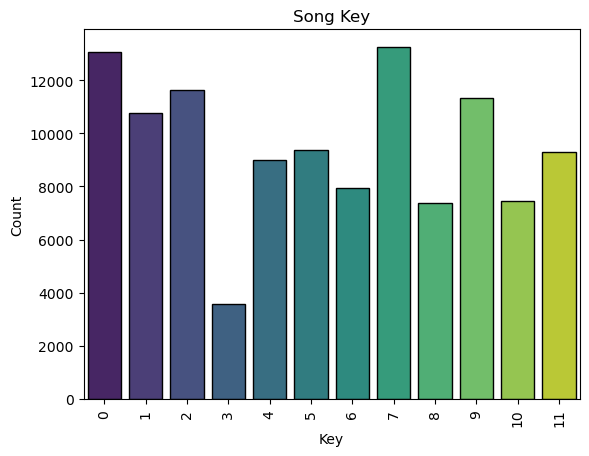

In [18]:
categorical_eda_plot(df, "key", "Song Key", "Key", "Count")

Among the samples, category 7 has the largest number of samples, while category 3 has the smallest number of samples.

### Loudness            

In [19]:
numeric_eda_summary(df, "loudness")

count    114000.000000
mean         -8.258960
std           5.029337
min         -49.531000
25%         -10.013000
50%          -7.004000
75%          -5.003000
max           4.532000
Name: loudness, dtype: float64

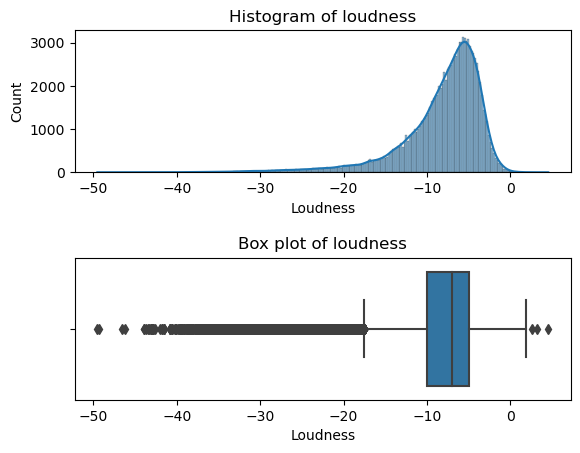

In [20]:
numeric_eda_plots(df, "loudness", "Loudness")

The mean value is -8.26 dB and the standard deviation is 5.03 dB, which shows that the data is relatively widely distributed, while the minimum value is -49.53 dB and the maximum value is 4.53 dB, which shows that the data range is very wide, covering from very low to Relatively high audio loudness levels. 25% of the data is below -10.01 dB, 50% of the data is below -7.00 dB, and 75% of the data is below -5.00 dB. These quantiles further reveal the distribution of the data. Taken together, this set of data shows the diversity of audio loudness levels, ranging from very low to relatively high.

### Mode                  

In [21]:
categorical_eda_summary(df, "mode")

,Category,Count,Percentage of Total
0,1,72681,63.76
1,0,41319,36.24


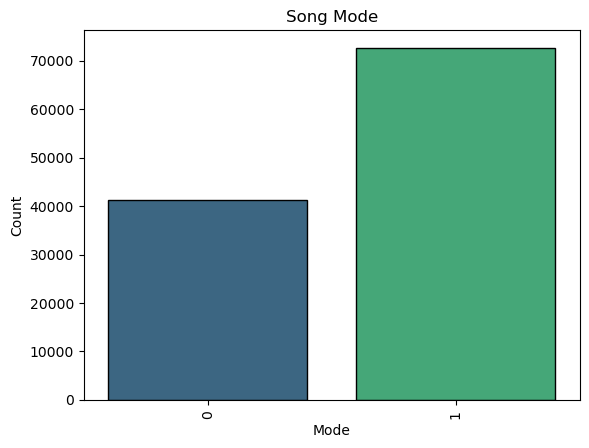

In [22]:
categorical_eda_plot(df, "mode", "Song Mode", "Mode", "Count")

Mode0 has 41,319 samples, accounting for 36.24% of the total, while mode1 has 72,681 samples, accounting for 63.76% of the total. The number of songs with mode 1 is much more than the number of songs with mode 0.

### Speechiness         

In [23]:
numeric_eda_summary(df, "speechiness")

count    114000.000000
mean          0.084652
std           0.105732
min           0.000000
25%           0.035900
50%           0.048900
75%           0.084500
max           0.965000
Name: speechiness, dtype: float64

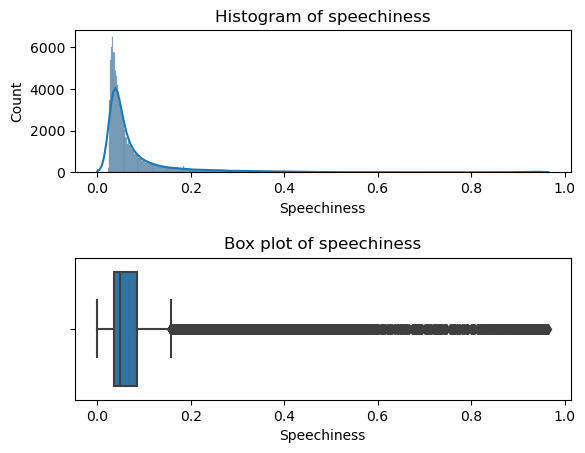

In [24]:
numeric_eda_plots(df, "speechiness", "Speechiness")

This variable represents the proportion of speech in the audio. The data shows that the average voice ratio is 0.0847 and the standard deviation is 0.1057, indicating that there is a large change in the voice ratio between samples. The lowest speech ratio is 0, while the highest speech ratio reaches 0.965, showing the presence of extreme speech and non-speech audio in the sample. The voice ratio of 25% of the samples is lower than 0.0359, and the voice ratio of 75% of the samples is lower than 0.0845, indicating that the voice ratio of most samples is relatively low.

### Acousticness        

In [25]:
numeric_eda_summary(df, "acousticness")

count    114000.000000
mean          0.314910
std           0.332523
min           0.000000
25%           0.016900
50%           0.169000
75%           0.598000
max           0.996000
Name: acousticness, dtype: float64

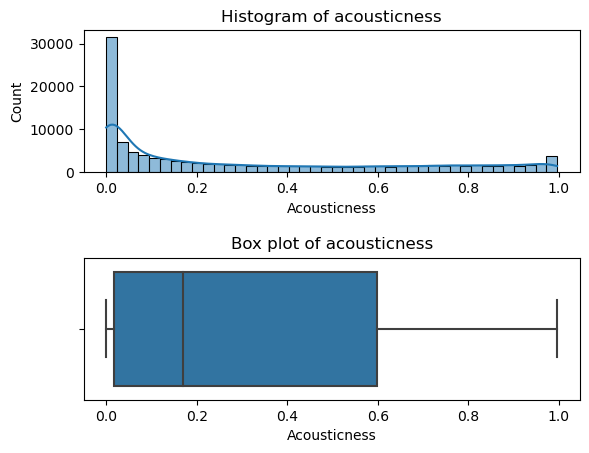

In [26]:
numeric_eda_plots(df, "acousticness", "Acousticness")

The mean value is 0.3149, showing a moderate degree of acoustic properties for the samples overall, while the standard deviation is 0.3325, revealing a considerable range of variation in acoustic properties between samples. The minimum value is 0, indicating that there are some samples composed entirely of electronic sounds, while the maximum value is 0.996, indicating that some samples are composed almost entirely of acoustic instruments or natural sounds. The quantile shows the distribution of the data, with the first quartile being 0.0169, the median being 0.169, and the third quartile being 0.598, which further highlights the central tendency of the acoustic properties, but also shows that there is Extreme non-acoustic or highly acoustic sample situations.

### Instrumentalness    

In [27]:
numeric_eda_summary(df, "instrumentalness")

count    114000.000000
mean          0.156050
std           0.309555
min           0.000000
25%           0.000000
50%           0.000042
75%           0.049000
max           1.000000
Name: instrumentalness, dtype: float64

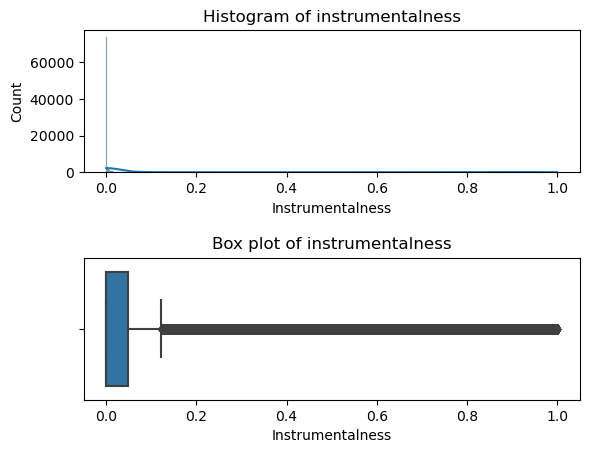

In [28]:
numeric_eda_plots(df, "instrumentalness", "Instrumentalness")

The average "instrumentalness" score is 0.156, which shows that the musical work as a whole has a certain instrumental component, but may also contain other non-instrumental elements. The standard deviation is 0.310, indicating that the distribution of instrumental music level is relatively wide, and there are some cases where some samples deviate greatly from the average level. There are samples with a minimum value of 0 in the data, indicating that some musical works contain no instrumental components at all, while the maximum value is 1, indicating that some samples are purely instrumental works without any vocals or lyrics. The 25%, 50% and 75% quantiles are 0, 0.000042 and 0.049 respectively. These quantiles reveal the concentration of instrumental music in most musical works. Taken together, the data show the prevalence of instrumental elements in musical works, but there are also works that gravitate towards the extremes of non-instrumental or purely instrumental.

### Liveness            

In [29]:
numeric_eda_summary(df, "liveness")

count    114000.000000
mean          0.213553
std           0.190378
min           0.000000
25%           0.098000
50%           0.132000
75%           0.273000
max           1.000000
Name: liveness, dtype: float64

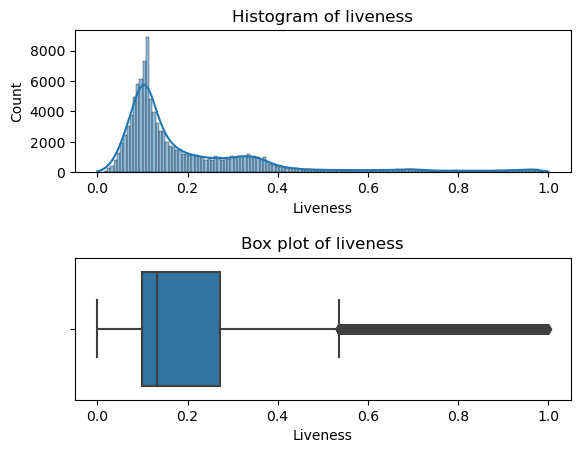

In [30]:
numeric_eda_plots(df, "liveness", "Liveness")

The average performance activity score is 0.2135, indicating that the overall performance activity of the sample is slightly lower, but the data is highly dispersed, with a standard deviation of 0.1904. There are cases where the lowest score is 0 and the highest score is 1. The quantile shows the overall distribution of scores. 25% of the samples have an activity score lower than 0.098, while 50% of the samples have an activity score lower than 0.132, and 75% of the samples have an activity score of less than 0.098. Below 0.273. These data show that although most samples are less active, there are also extreme cases where some samples are more active.

### Valence             

In [31]:
numeric_eda_summary(df, "valence")

count    114000.000000
mean          0.474068
std           0.259261
min           0.000000
25%           0.260000
50%           0.464000
75%           0.683000
max           0.995000
Name: valence, dtype: float64

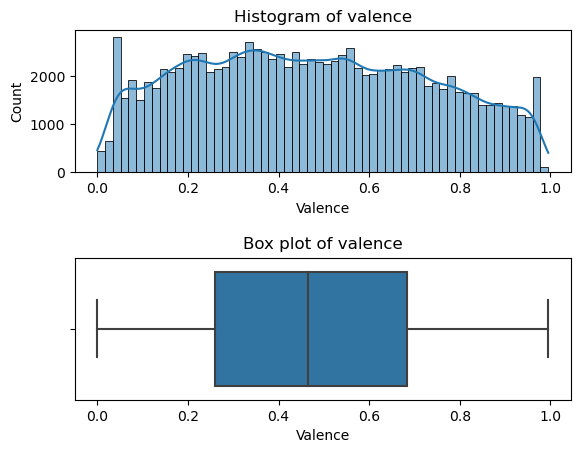

In [32]:
numeric_eda_plots(df, "valence", "Valence")

The mean (mean) of the data is 0.474 and the standard deviation (std) is 0.259, indicating a certain degree of variation and dispersion in the data distribution. The minimum value (min) is 0 and the maximum value (max) is 0.995, which means that the pleasantness score ranges from the lowest 0 to nearly the highest 1. The 25%, 50%, and 75% quantiles are 0.26, 0.464 respectively. and 0.683, these quantiles reveal the overall shape of the data distribution, showing that the pleasantness scores of most samples are clustered around the mid-range level.

Taken together, this set of data shows the distribution of music pleasantness scores. The pleasantness scores of most samples are concentrated at the medium level, but there are also some extreme values, such as samples with the highest score close to 1.

### Tempo               

In [33]:
numeric_eda_summary(df, "tempo")

count    114000.000000
mean        122.147837
std          29.978197
min           0.000000
25%          99.218750
50%         122.017000
75%         140.071000
max         243.372000
Name: tempo, dtype: float64

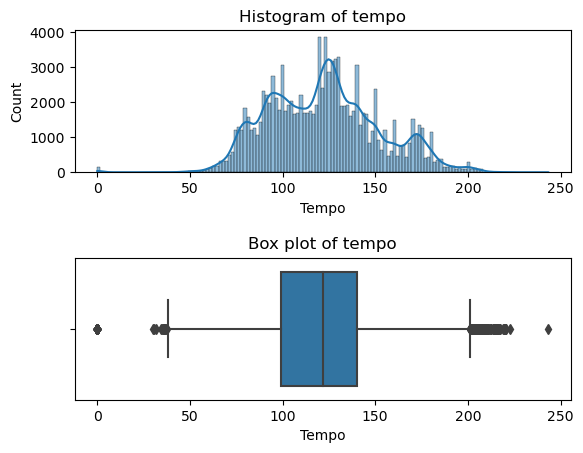

In [34]:
numeric_eda_plots(df, "tempo", "Tempo")

The mean (mean) is 122.15, indicating that the overall musical rhythm of this set of data is about 122 beats per minute.
The standard deviation (std) is 29.98, which indicates the degree of change in the rhythm, that is, the rhythm of most samples fluctuates around the average value, but there are also certain differences.
The minimum value (min) is 0, which may indicate some anomaly or a static audio file.
The maximum value (max) is 243.37, indicating that the highest rhythm reaches about 243 beats per minute, which is a relatively fast rhythm.
The 25%, 50% and 75% quantiles are 99.22, 122.02 and 140.07 respectively. These quantiles provide further insight into the distribution of the data, showing the median and distribution range of the rhythm values.
Taken together, this set of data reveals the overall characteristics of music rhythm. The rhythm of most samples is close to the average, but there are also some rhythm extremes, showing certain differences and diversity overall.

### Time Signature        

In [35]:
categorical_eda_summary(df, "time_signature")

,Category,Count,Percentage of Total
0,4,101843,89.34
1,3,9195,8.07
2,5,1826,1.60
3,1,973,0.85
4,0,163,0.14


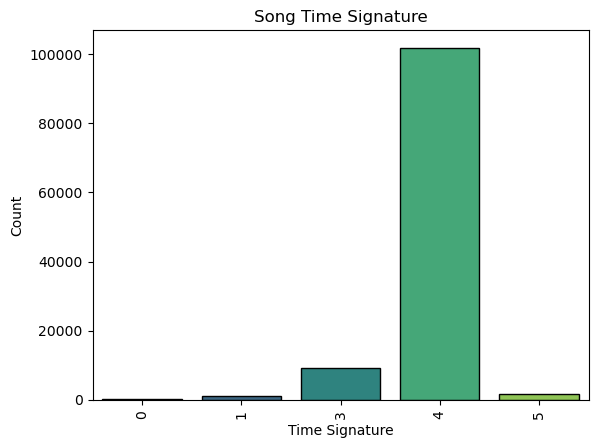

In [36]:
categorical_eda_plot(df, "time_signature", "Song Time Signature", "Time Signature", "Count")

Among these samples, the distribution of time signatures shows obvious dominant characteristics, with 89.34% of the tracks using a 4/4 (four-quarters) time signature, which is one of the most common time signatures in music. Generally considered stable and easy to follow. Next is the 3/4 (four-thirds) time signature, accounting for 8.07%, which is usually used for slower dance music or soft tunes. Signatures at other times are less commonly used, with 5/4 (four out of five) accounting for 1.60%, 1/4 (one fourth) accounting for 0.85%, and 0/4 (zero fourth) accounting for 0.14%. These rare time signatures may be used for specific types of music or creative styles, providing a certain reference for changes and innovations in music styles.

## Correlation Analysis

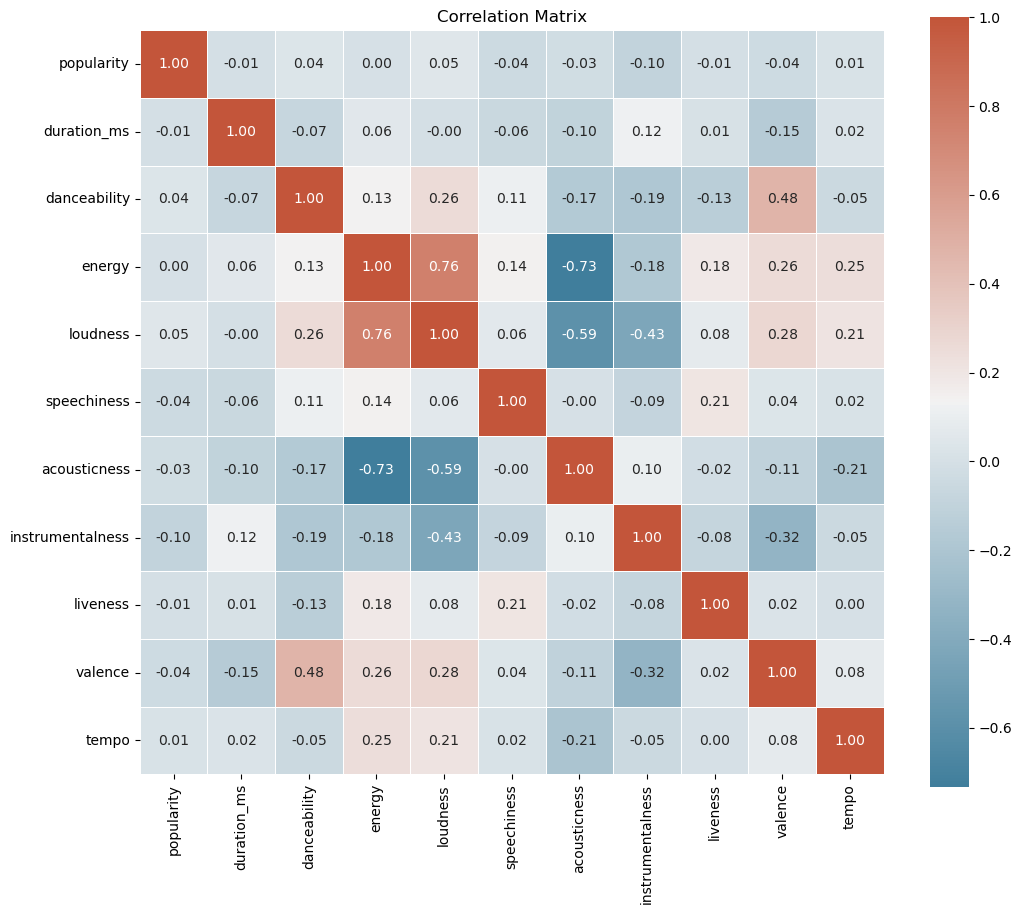

In [37]:
# Numeric Columns
numeric_cols = ["popularity","duration_ms","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]

# Build the numeric dataframe
numeric_df = df[numeric_cols]

# Create a larger figure
plt.figure(figsize=(12, 10))

# Plot title
plt.title("Correlation Matrix")

# Compute the correlation matrix
corr = numeric_df.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=.5, cmap=cmap, square = True)

# Display the plot
plt.show()

There's a slight positive correlation between loudness and energy, and a slight negative correlation between acousticness and energy. Additionally, loudness is slightly negatively correlated with acousticness and instrumentalness. Aside from these low correlations, no other correlations can be found between the numeric features of this dataset.

# Data Preparation

## Data Cleaning

### Non-Sound based Genres

To focus on genre prediction based solely on sound characteristics, genres like 'British', 'French', or 'German' will be excluded from the target variable before training the models. These classifications are based on origin or language, which aren't captured by the audio features in our dataset.

In [38]:
# Drop rows where the condition is True
non_sound_based_categories = ['british','french','german','swedish','spanish','indian','malay','turkish','world-music','gospel']
df = df.drop(df[df['track_genre'].isin(non_sound_based_categories)].index)

### Non-Explanatory Features

Several features will be excluded before training, as they don't directly reflect musical content: track_id, artist name, album name, and track name. These identifiers won't contribute to genre prediction based on audio characteristics

In [39]:
# Drop non explanatory features
df = df.drop(columns = ['track_id','artists','album_name','track_name'])

## Feature Engineering

### One-Hot Encoding and Binarization

To prepare categorical features for modeling, 'explicit' was converted to binary (0/1) for true/false values. Additionally, one-hot encoding was applied to 'key' and 'time_signature'. This creates separate binary columns for each unique value within those features, prefixed with 'key' and 'meter' respectively. Importantly, dropping the first dummy variable in each category addresses multicollinearity, which can negatively impact model performance.

In [40]:
# Map the explicit column to binary values
df['explicit'] = df['explicit'].map({False: 0,True: 1})

# Perform one-hot encoding
df = pd.get_dummies(df, columns=['key'], prefix = 'key', drop_first=True)
df = pd.get_dummies(df, columns=['time_signature'], prefix = 'meter', drop_first=True)

### Scaling

Numeric features within the dataset were standardized to ensure all features have a mean of 0 and a standard deviation of 1. This technique, known as standard scaling, helps prevent features with larger scales from dominating the modeling process and allows the models to learn more effectively from the combined features.

In [41]:
# Perform Scaling
df = perform_scaling(df, numeric_cols, 1)

## Genres Consolidation

The initial dataset contained a vast number of genres (114), with some exhibiting high similarity. To address this and create more manageable categories, we employed a genre reduction strategy. First, we constructed a new dataframe by calculating the average values of each music metric across all 114 genres. This essentially compressed the data into a single point per original genre, capturing the average characteristics of songs within that genre.

Next, we leveraged hierarchical clustering, a technique that iteratively groups similar data points together. Applied to our averaged genre data, hierarchical clustering identified 56 distinct clusters. These clusters represent groups of similar musical styles based on the features we possess.

Finally, to enhance interpretability and future analysis, we drew upon our understanding of music genres to assign meaningful names to each of the 56 newly formed clusters. This step involved examining the music metrics within each cluster and identifying characteristics that aligned with known genres or subgenres. By incorporating domain knowledge, we transformed the clusters into more user-friendly and informative categories that better reflect the musical landscape captured by the data.

### Hierarchical Clustering

Hierarchical clustering was performed to group similar genres.  First, average feature values were calculated for each genre (genres_average). Then, the sch.dendrogram function from SciPy visualized the clustering process. This creates a dendrogram plot, a tree-like structure where branches represent merged clusters based on their feature similarities (distances). Labels from the original genres_average dataframe are used for the x-axis. Examining the dendrogram helped us determine an appropriate number of clusters to cut the hierarchy into, creating the final set of reduced genres

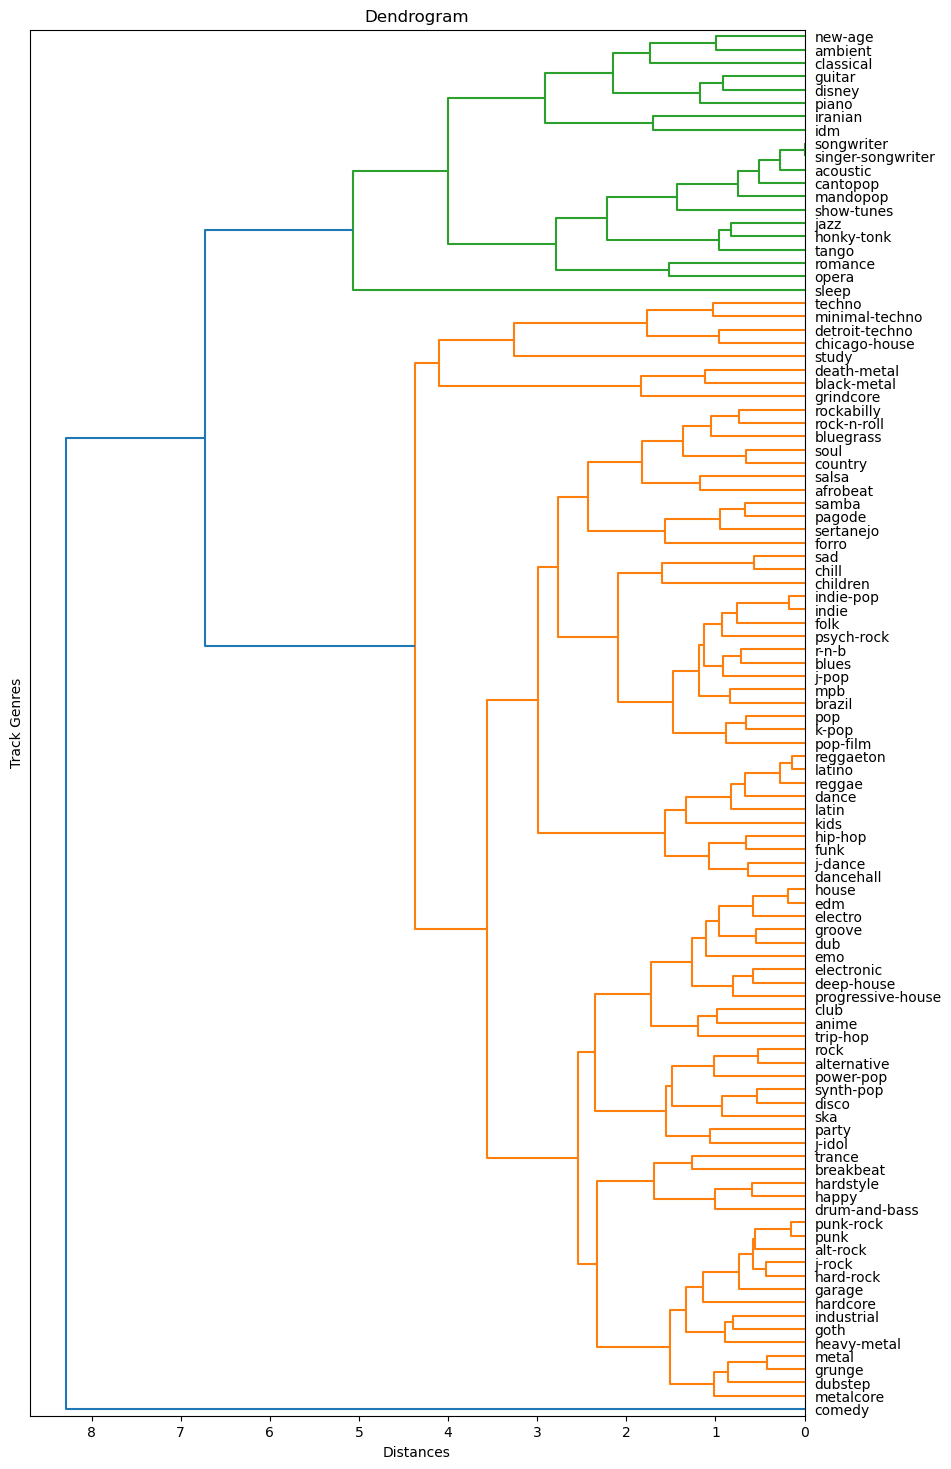

In [42]:
import scipy.cluster.hierarchy as sch

genres_average = df.groupby('track_genre').mean()

# Perform hierarchical clustering
plt.figure(figsize=(10, 18)) 
dendrogram = sch.dendrogram(sch.linkage(genres_average, method='complete'), 
                            labels=genres_average.index, 
                            orientation='left') 

# Show the dendrogram
plt.title('Dendrogram')
plt.xlabel('Distances') 
plt.ylabel('Track Genres')

# Increase the size of y-labels
plt.tick_params(axis='y', labelsize=10)

plt.savefig('dendrogram.png', bbox_inches='tight')  

# Show the plot
plt.show()

### Threshold Selection

Leveraging the insights from the dendrogram, a distance threshold of 1 was chosen to cut the hierarchical clustering and create the final set of genres. The fcluster function assigned each genre in genres_average to a cluster based on similarity (using a distance threshold of 1). These cluster labels were added to the dataframe. A dictionary (cluster_dict) was built to explore cluster composition. It groups genres by their assigned cluster, providing a view of which original genres were merged into the 56 final clusters.

In [43]:
from scipy.cluster.hierarchy import fcluster

# Perform hierarchical clustering
linkage_matrix = sch.linkage(genres_average, method='complete')

# Specify the distance threshold
threshold = 1

# Extract the cluster labels based on the threshold
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

# Add cluster labels to the original DataFrame
genres_average['Cluster'] = clusters

# Set the maximum number of rows to display
pd.set_option('display.max_rows', 60)

# Create a dictionary to store classes and clusters
cluster_dict = {}
for i, (cluster, category) in enumerate(zip(clusters, genres_average.index)):
    if cluster not in cluster_dict:
        cluster_dict[cluster] = []
    cluster_dict[cluster].append(category)

ordered_cluster_dict = dict(sorted(cluster_dict.items()))

# Display the dictionary sorted by cluster    
ordered_cluster_dict

{1: ['dubstep', 'grunge', 'metal'],
 2: ['metalcore'],
 3: ['goth', 'heavy-metal', 'industrial'],
 4: ['alt-rock', 'garage', 'hard-rock', 'j-rock', 'punk', 'punk-rock'],
 5: ['hardcore'],
 6: ['happy', 'hardstyle'],
 7: ['drum-and-bass'],
 8: ['breakbeat'],
 9: ['trance'],
 10: ['j-idol'],
 11: ['party'],
 12: ['disco', 'ska', 'synth-pop'],
 13: ['alternative', 'rock'],
 14: ['power-pop'],
 15: ['anime', 'club'],
 16: ['trip-hop'],
 17: ['deep-house', 'electronic', 'progressive-house'],
 18: ['dub', 'edm', 'electro', 'groove', 'house'],
 19: ['emo'],
 20: ['dancehall', 'j-dance'],
 21: ['funk', 'hip-hop'],
 22: ['dance', 'latin', 'latino', 'reggae', 'reggaeton'],
 23: ['kids'],
 24: ['k-pop', 'pop', 'pop-film'],
 25: ['brazil', 'mpb'],
 26: ['blues', 'j-pop', 'r-n-b'],
 27: ['folk', 'indie', 'indie-pop', 'psych-rock'],
 28: ['chill', 'sad'],
 29: ['children'],
 30: ['pagode', 'samba', 'sertanejo'],
 31: ['forro'],
 32: ['afrobeat'],
 33: ['salsa'],
 34: ['country', 'soul'],
 35: ['rock

### Genres Grouping

After applying hierarchical clustering and identifying 56 distinct clusters, we employed our domain knowledge of music genres to assign meaningful names to these newly formed groups. By analyzing the musical characteristics (tempo, danceability, etc.) within each cluster, we were able to identify patterns that aligned with known genres or subgenres. This process transformed the numerical cluster labels (1, 2, 3, etc.) into descriptive names that better reflect the musical styles grouped within each cluster.  Leveraging this domain knowledge enhances interpretability and facilitates future analysis of the music data.

In [44]:
# Threshold 1 - 56 clusters

consolidated_genres = {'agressive-fusion': ['dubstep', 'grunge', 'metal'],
                       'industrial': ['goth', 'heavy-metal', 'industrial'],
                       'punk-rock': ['alt-rock', 'garage', 'hard-rock', 'j-rock', 'punk', 'punk-rock'],
                       'hardstyle': ['happy', 'hardstyle'],
                       'disco-ska': ['disco', 'ska', 'synth-pop'],
                       'rock': ['alternative', 'rock'],
                       'anime': ['anime', 'club'],
                       'edm-house': ['deep-house', 'electronic', 'progressive-house'],
                       'edm': ['dub', 'edm', 'electro', 'groove', 'house'],
                       'j-dance': ['dancehall', 'j-dance'],
                       'funk-hip-hop': ['funk', 'hip-hop'],
                       'latin': ['dance', 'latin', 'latino', 'reggae', 'reggaeton'],
                       'pop': ['k-pop', 'pop', 'pop-film'],
                       'brazilian': ['brazil', 'mpb'],
                       'blues-rnb': ['blues', 'j-pop', 'r-n-b'],
                       'indie': ['folk', 'indie', 'indie-pop', 'psych-rock'],
                       'chill': ['chill', 'sad'],
                       'pagode-samba': ['pagode', 'samba', 'sertanejo'],
                       'country-soul': ['country', 'soul'],
                       'rock-n-roll': ['rock-n-roll', 'rockabilly'],
                       'chicago-house': ['chicago-house', 'detroit-techno'],
                       'jazz-tango': ['honky-tonk', 'jazz', 'tango'],
                       'vocal-pop': ['acoustic', 'cantopop', 'mandopop', 'singer-songwriter', 'songwriter'],
                       'disney': ['disney', 'guitar'],
                       'soundscape': ['ambient', 'new-age']}

# Create a dictionary to map old genres to new genres
genre_map = {old_genre: new_genre for new_genre, old_genres in consolidated_genres.items() for old_genre in old_genres}

# Replace the old genres with the new genres
df['track_genre'] = df['track_genre'].replace(genre_map)

# Save the dataframe for prepped data review
df_pdr = df

# Prepped Data Review

## Bivariate EDA

In [45]:
df_pdr_groupby = df_pdr.groupby('track_genre').mean()
df_pdr_groupby_percentage = df_pdr_groupby * 100

### Percentage of explicit songs by Genre


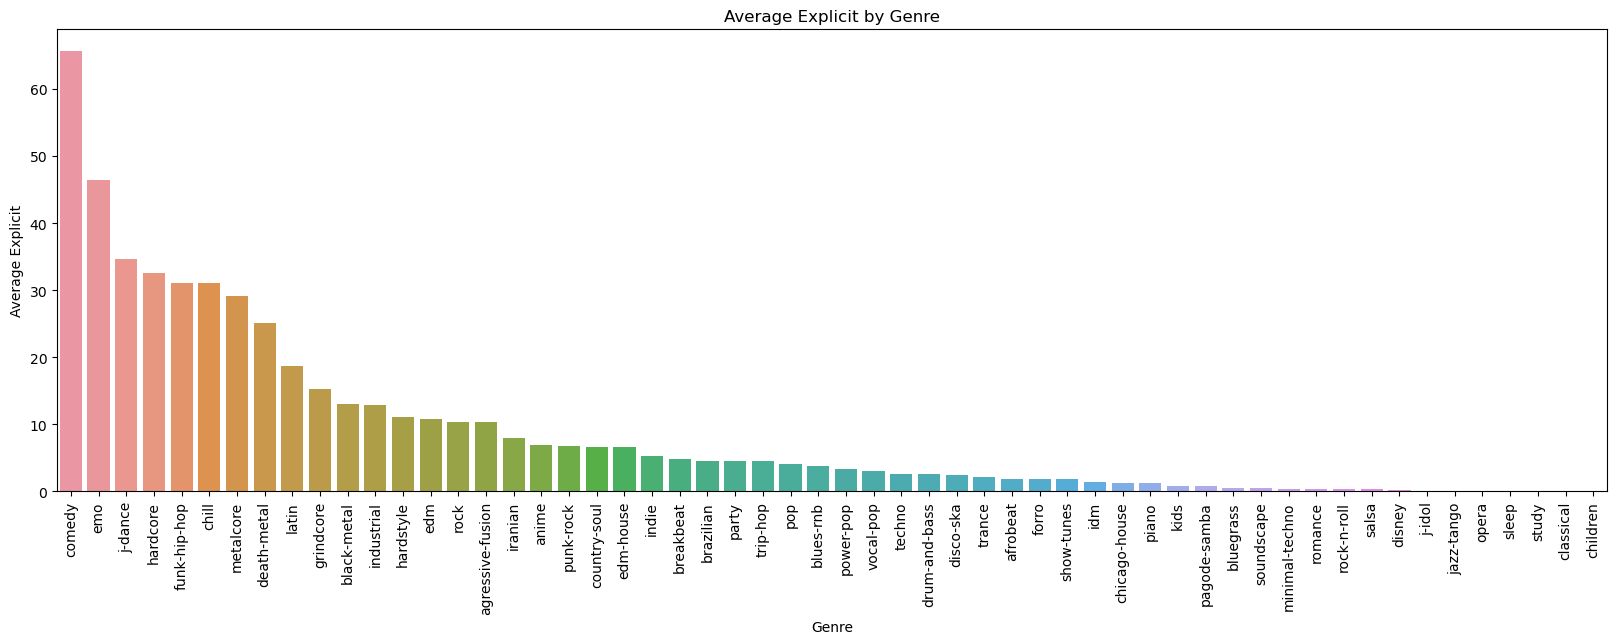

In [46]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'explicit', 'Average Explicit by Genre')

As it shown, the top 5 of the average explicit of genre is comedy,emo,j-dance, hardcore and funk-hip-hop. The bottom 5 is children, classical, study, sleep and opera. The top 5 genres with the highest average explicitness tend to encompass music genres known for their candid expression and edgy content, such as comedy, emo, and hip-hop variations, while the bottom 5 genres, like children's music and classical compositions, typically avoid explicit themes to maintain their intended audience or artistic tradition.

### Percentage of songs in major scale by Genre


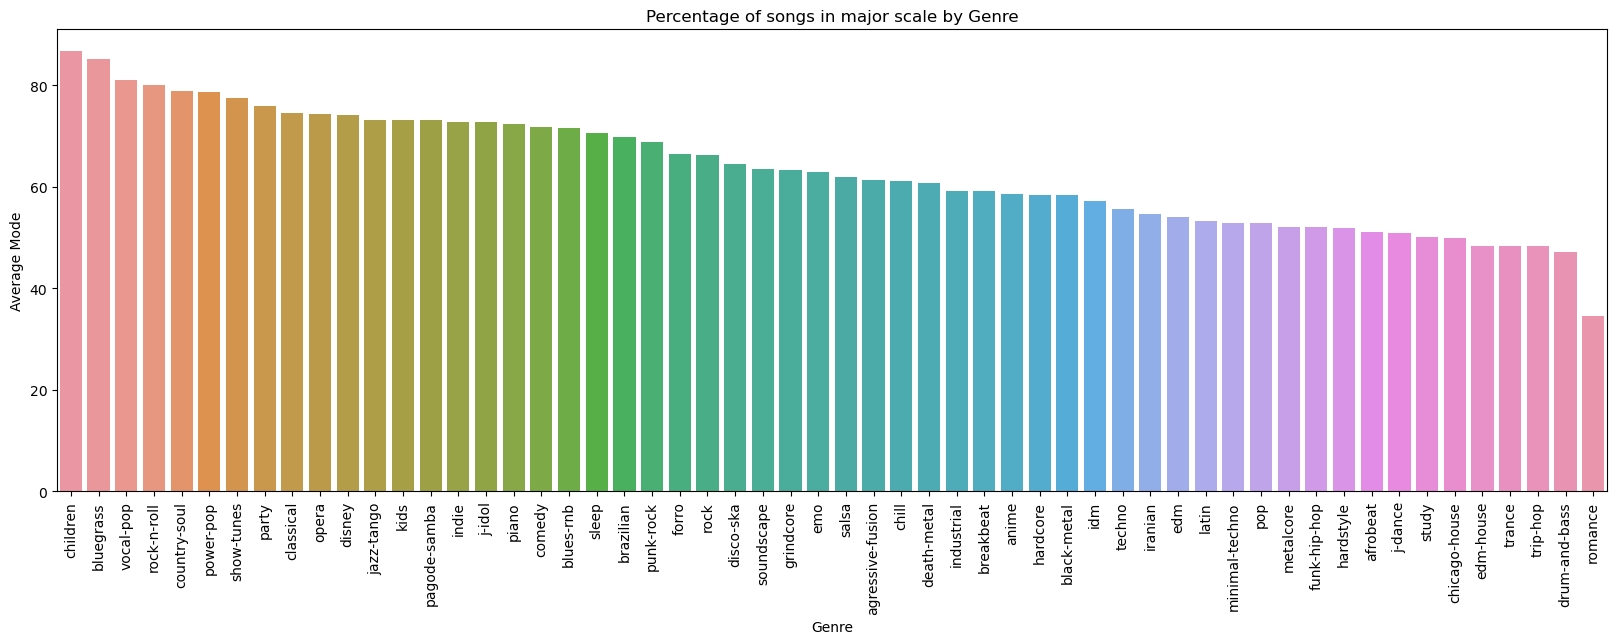

In [47]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'mode', 'Percentage of songs in major scale by Genre')

As it shown, The top 5 genres with the highest average mode include children, bluegrass, vocal-pop, rock-n-roll, and country-soul. These genres often feature distinct musical characteristics or themes that are well-defined and consistent within each track, leading to a higher average mode value.

On the other hand, the bottom 5 genres with the lowest average mode, comprising romance, drum-and-bass, trip-pop, trance, and edm-house, may exhibit greater variation or diversity in their musical elements, resulting in lower mode values across tracks within each genre.

### Percentage of songs in C pitch by Genre


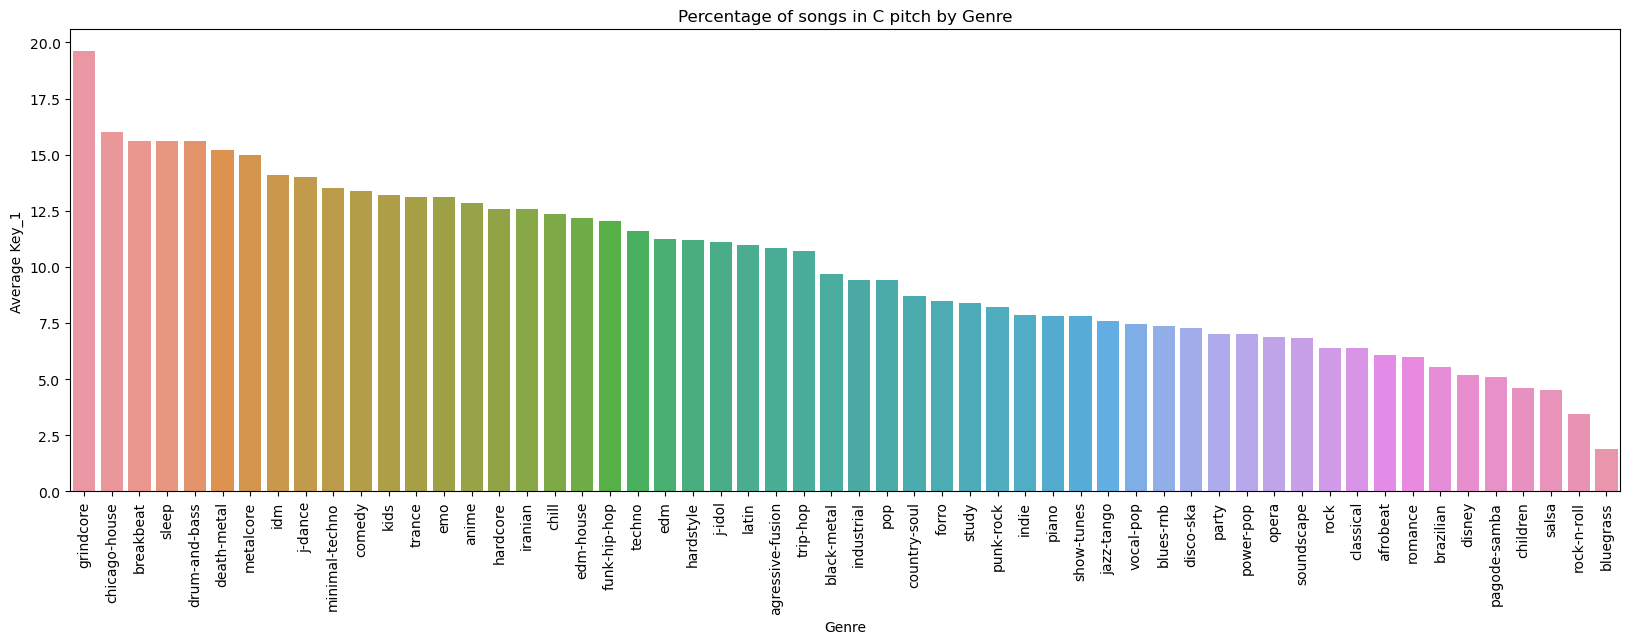

In [48]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'key_1', 'Percentage of songs in C pitch by Genre')

As it shown, the top 5 genres with the highest average "key_1" values likely feature music compositions characterized by distinct tonal centers or keys, such as grindcore, Chicago house, breakbeat, sleep, and drum-and-bass. On the other hand, the bottom 5 genres with the lowest average "key_1" values may predominantly consist of music genres less reliant on specific tonal structures, like bluegrass, rock-n-roll, salsa, children's music, and pagoda samba.

### Percentage of songs in D pitch by Genre


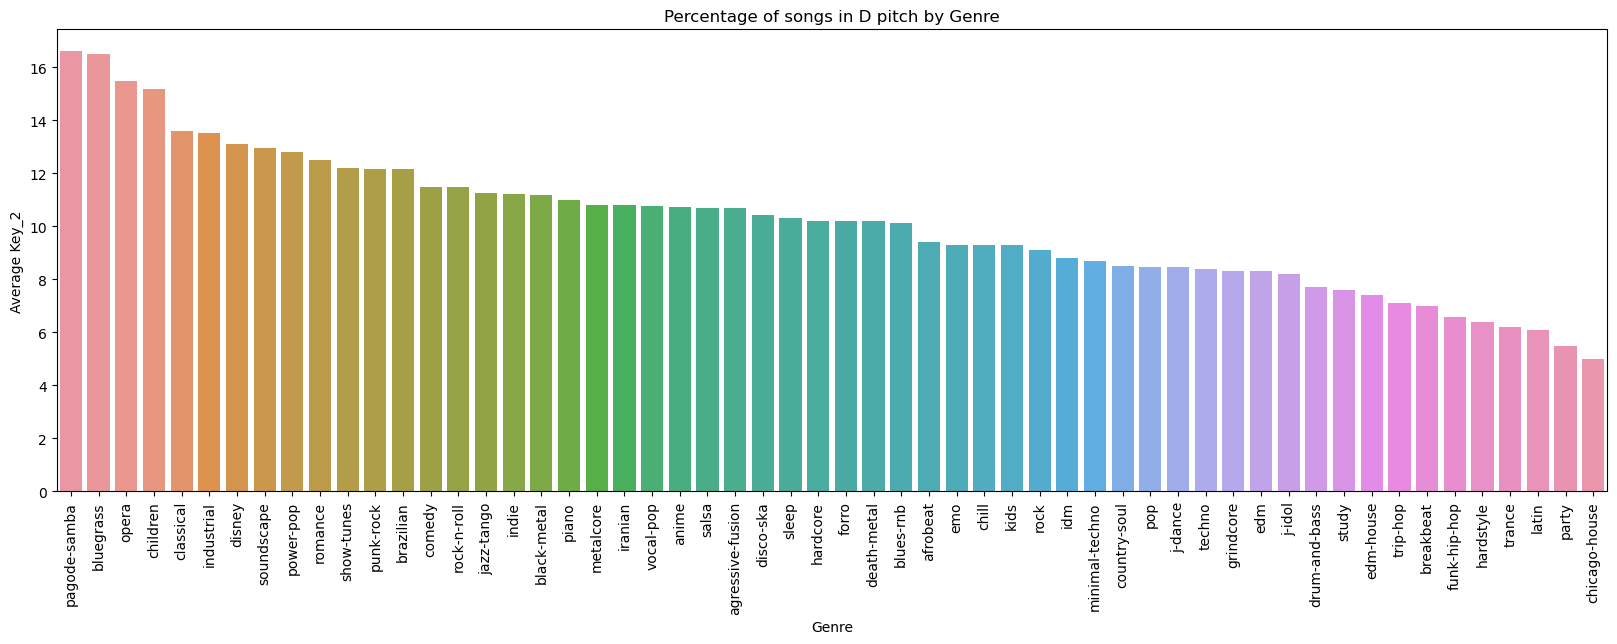

In [49]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'key_2', 'Percentage of songs in D pitch by Genre')

As it shown, the top 5 of average key 2 by genre are pagode-samba, bluegrass, opera,children and classical, the bottom 5 are chicago-house,party,latin,trance and hardstyle. The top 5 genres with the highest average value of key 2 include pagode-samba, bluegrass, opera, children, and classical. Conversely, the bottom 5 genres with the lowest average value of key 2 are chicago-house, party, latin, trance, and hardstyle. This indicates that genres like pagode-samba, bluegrass, opera, children, and classical tend to exhibit more prominent musical features associated with key 2, while chicago-house, party, latin, trance, and hardstyle genres demonstrate less emphasis on this particular musical attribute.

### Percentage of songs in D# pitch by Genre


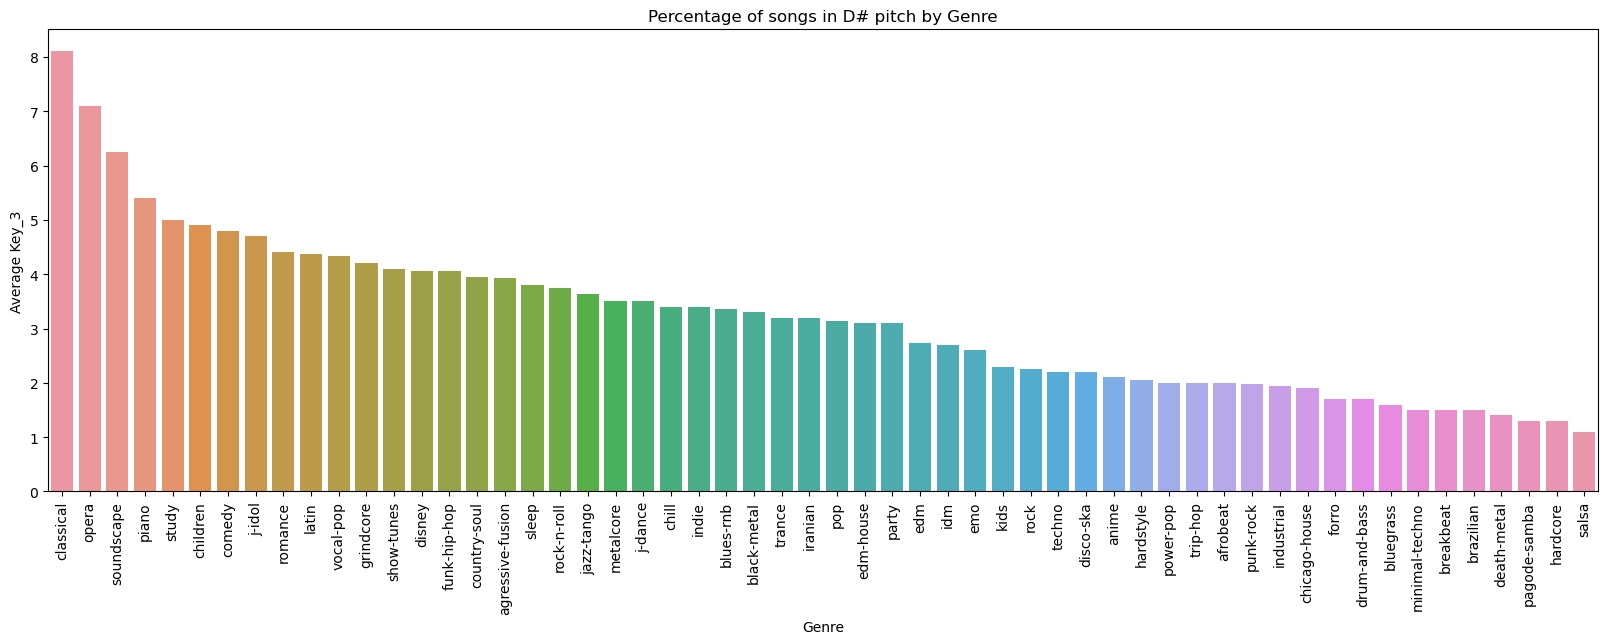

In [50]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'key_3', 'Percentage of songs in D# pitch by Genre')

The top 5 genres with the highest average Key 3 values (presumably representing a musical feature) by genre include classical, opera, soundscape, piano, and study. These genres are characterized by their emphasis on melodic complexity, harmonic richness, and subdued rhythms, which likely contribute to higher Key 3 scores. Conversely, the bottom 5 genres, including salsa, hardcore, pagode-samba, death-metal, and Brazilian music, may feature more rhythmic complexity, percussive elements, and aggressive tonalities, leading to lower Key 3 averages.

### Percentage of songs in E pitch by Genre


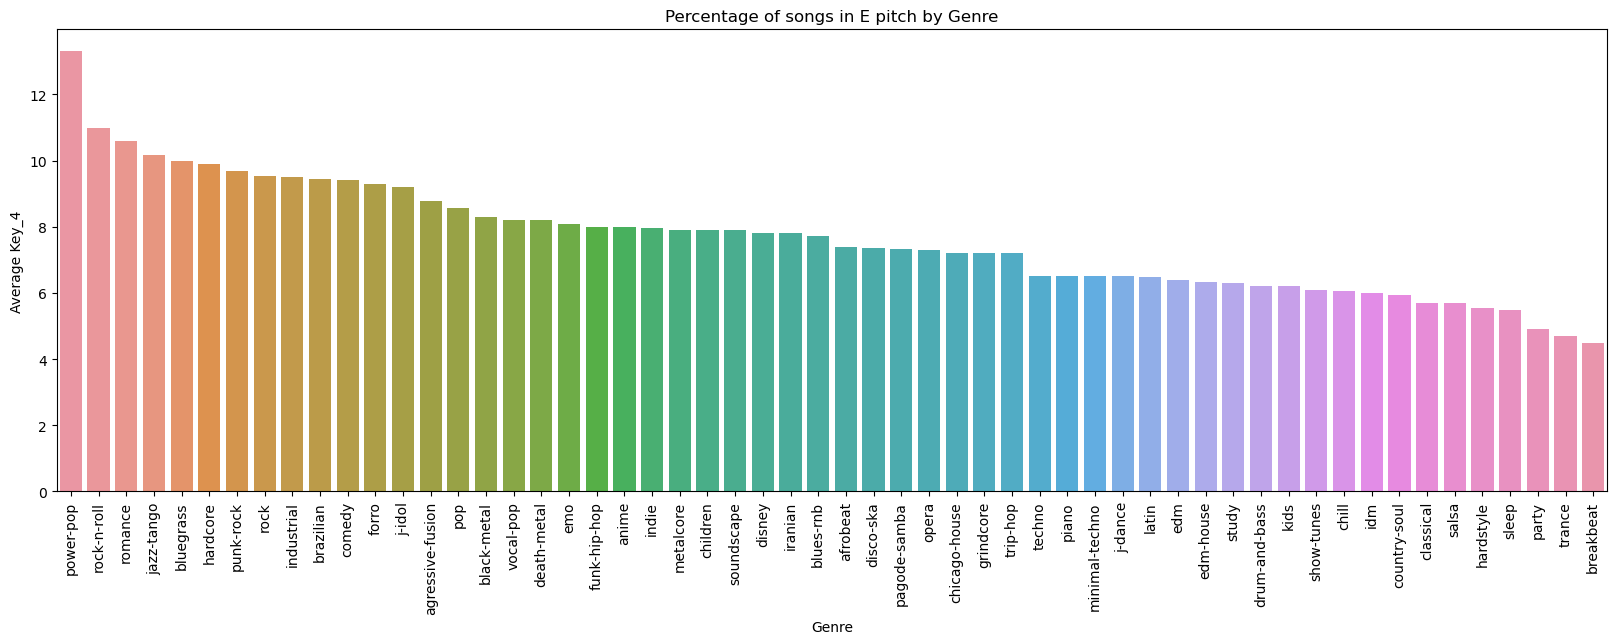

In [51]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'key_4', 'Percentage of songs in E pitch by Genre')

The top 5 genres in terms of the average of key 4  by genre tend to encompass music styles that emphasize certain tonal qualities or harmonic structures, such as power-pop, rock-n-roll, romance, jazz-tango, and bluegrass. On the other hand, the bottom 5 genres, including breakbeat, trance, party, sleep, and hardstyle, likely feature compositions where key 4 plays a less prominent role or exhibits less variation in its musical characteristics.

### Percentage of songs in F pitch by Genre


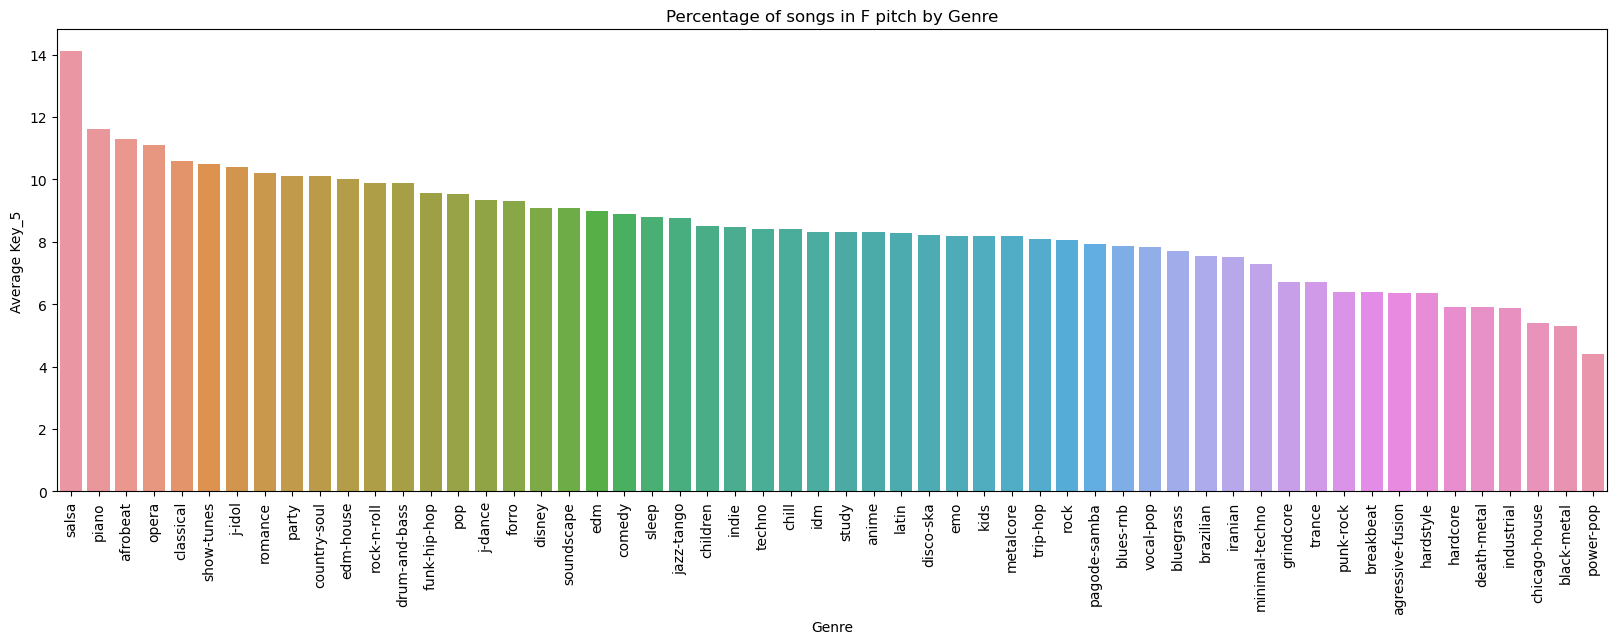

In [52]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'key_5', 'Percentage of songs in F pitch by Genre')

The top 5 genres in terms of the average value of key 5 (which likely represents a musical attribute) by genre are salsa, piano, afrobeat, opera, and classical. These genres may feature compositions with rich harmonic structures and diverse tonalities, leading to higher values for key 5. On the other hand, the bottom 5 genres, including power-pop, black-metal, Chicago-house, industrial, and death-metal, may prioritize other musical elements or characteristic sounds, resulting in lower values for key 5.

### Percentage of songs in F# pitch by Genre


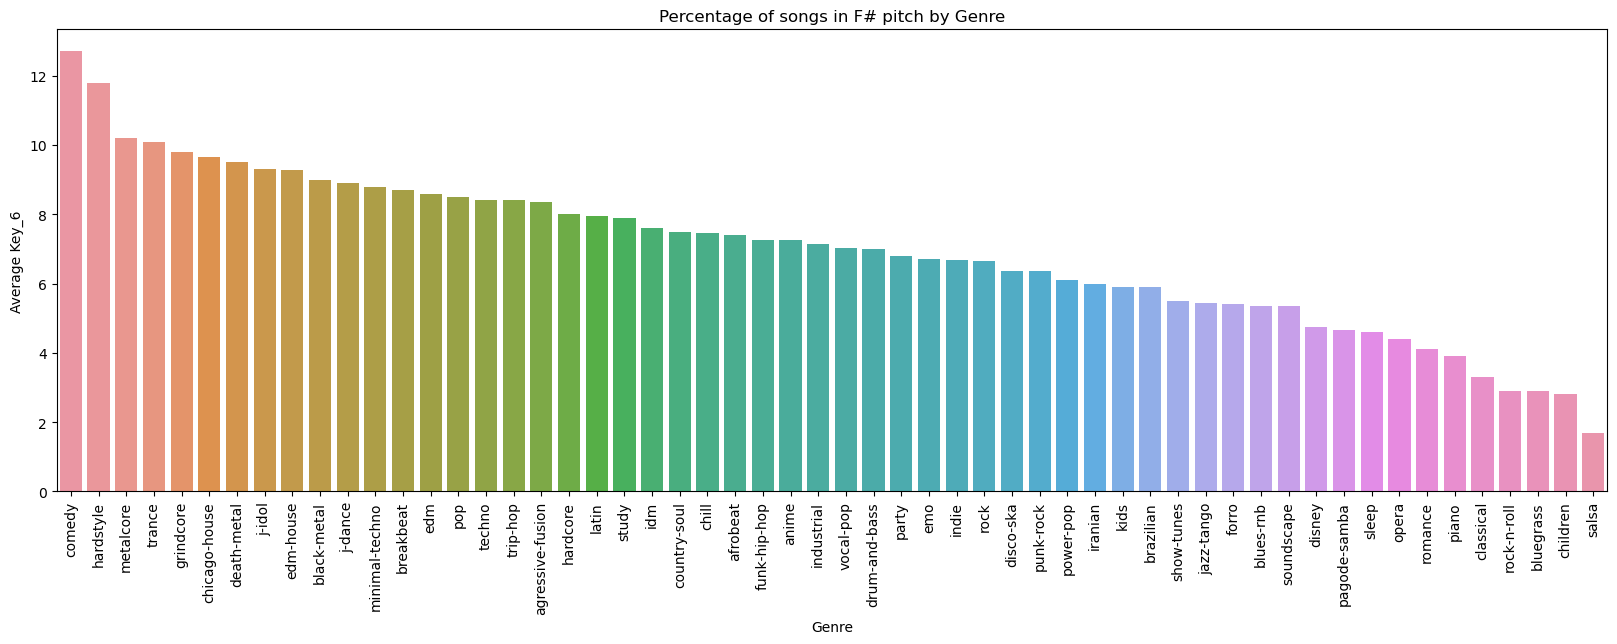

In [53]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'key_6', 'Percentage of songs in F# pitch by Genre')

The top 5 genres with the highest average value of "key_6" tend to be associated with more intense or energetic music styles like comedy, hardstyle, metalcore, trance, and grindcore. On the other hand, the bottom 5 genres with the lowest average "key_6" values include genres like salsa, children's music, bluegrass, rock-n-roll, and classical, which typically feature mellower or less aggressive musical characteristics.

### Percentage of songs in G pitch by Genre


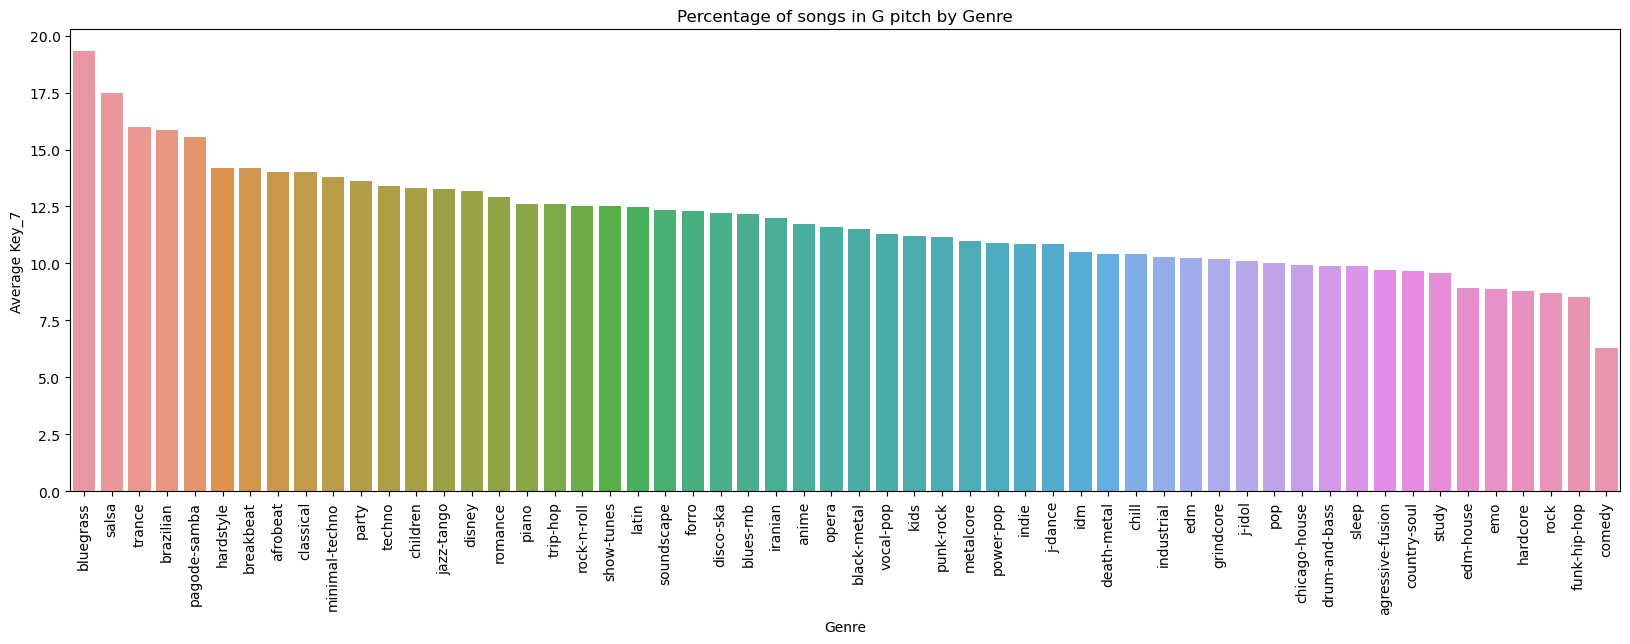

In [54]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'key_7', 'Percentage of songs in G pitch by Genre')


The top 5 genres with the highest average Key 7 values, including bluegrass, salsa, trance, Brazilian, and pagode-samba, suggest a musical inclination towards tonalities characterized by specific harmonic structures or emotional expressions. Conversely, the bottom 5 genres, such as comedy funk-hip-pop, rock, hardcore, and emo, exhibit comparatively lower average Key 7 values, possibly indicating a preference for musical styles with different tonal characteristics or harmonic complexities.

### Percentage of songs in G# pitch by Genre


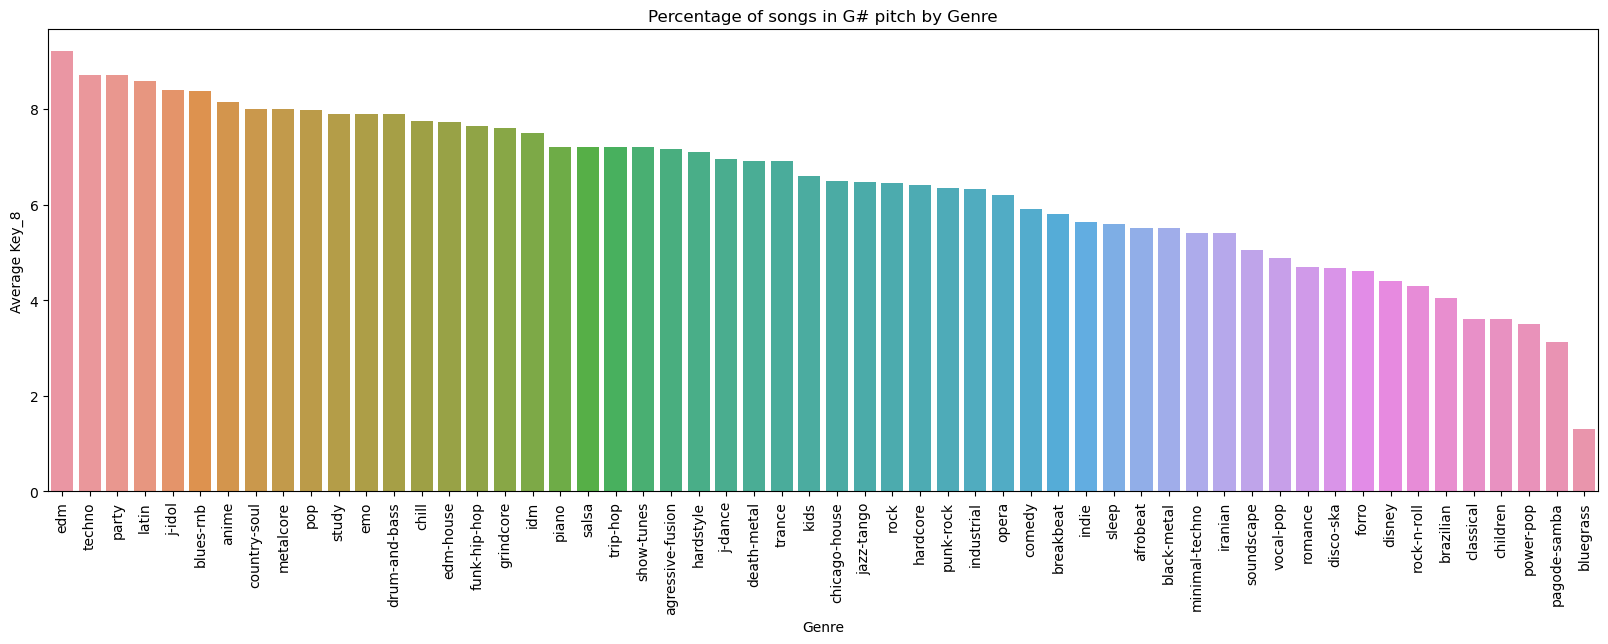

In [55]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'key_8', 'Percentage of songs in G# pitch by Genre')

The top 5 genres with the highest average key 8 tend to be EDM, techno, party, Latin, and J-idol, likely reflecting a preference for high-energy and danceable music styles where key changes, such as key 8, are more common. Conversely, the bottom 5 genres, including bluegrass, pagode-samba, power-pop, children, and classical, are typically characterized by more traditional or subdued musical styles, where key changes like key 8 may be less prevalent.

### Percentage of songs in A pitch by Genre


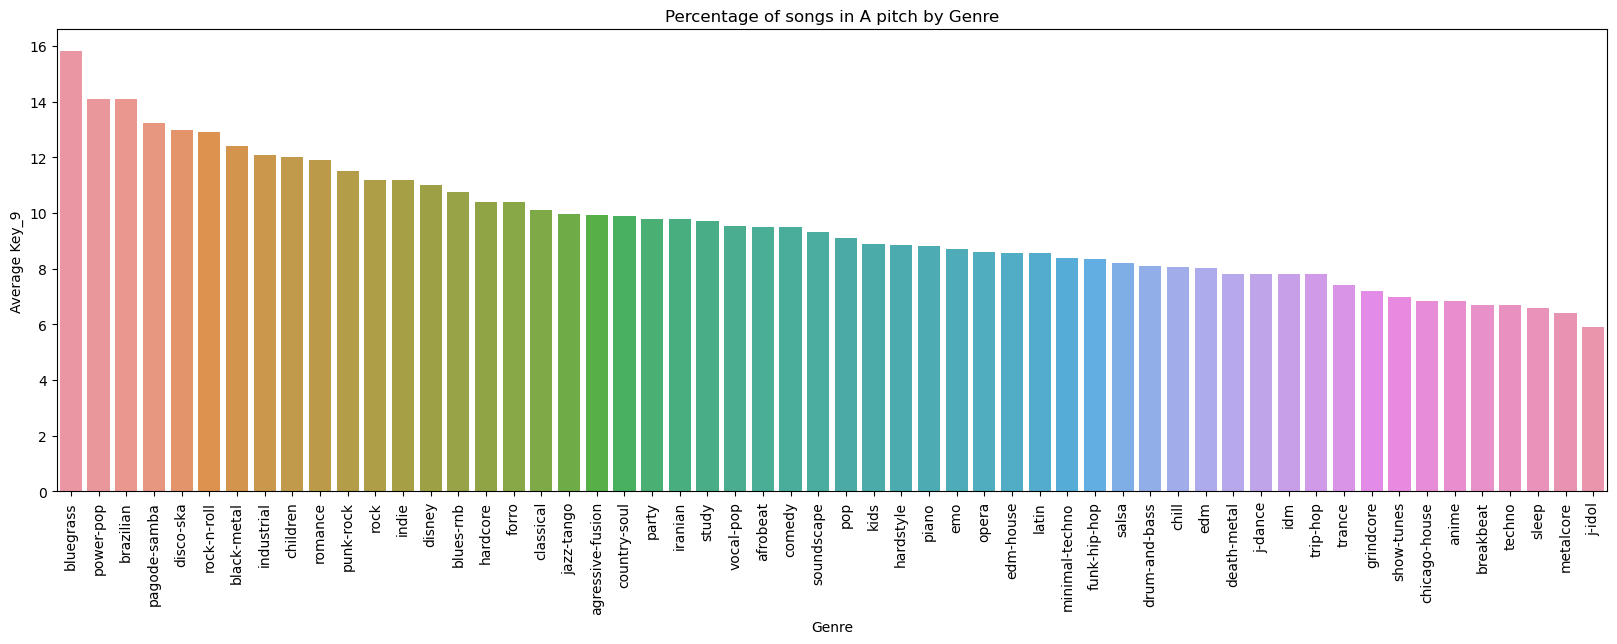

In [56]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'key_9', 'Percentage of songs in A pitch by Genre')


The top 5 genres with the highest average Key 9 values, including Bluegrass, Power-Pop, Brazilian, Pagode-Samba, and Disco-Ska, suggest a preference for musical styles characterized by certain tonalities or chord progressions. Conversely, the bottom 5 genres, featuring J-Idol, Metalcore, Sleep, Techno, and Breakbeat, exhibit lower average Key 9 values, indicating different tonal characteristics or harmonic structures within these genres.

### Percentage of songs in A# pitch by Genre


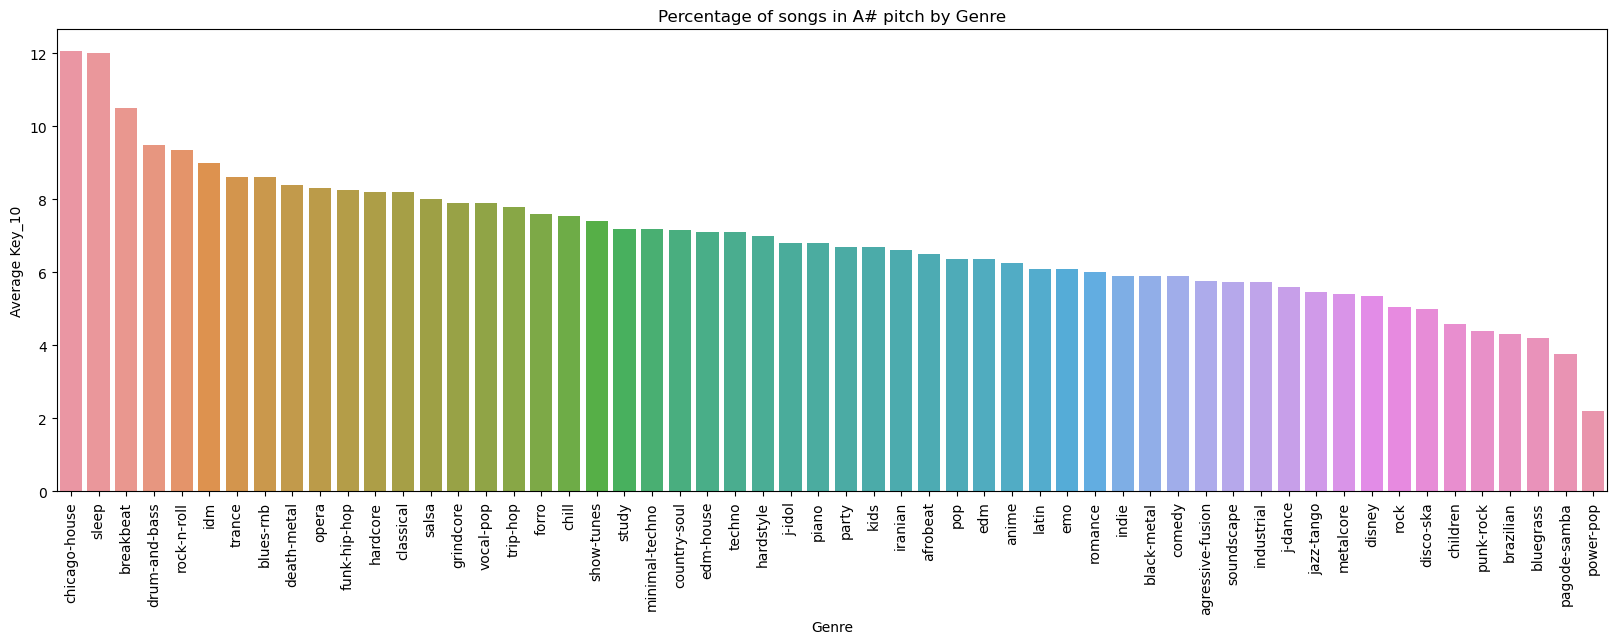

In [57]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'key_10', 'Percentage of songs in A# pitch by Genre')


The top 5 genres with the highest average key 10 values, including Chicago-house, sleep, breakbeat, drum-n-roll, and IDM, suggest a tendency towards more complex harmonic structures or tonalities within these genres. Conversely, the bottom 5 genres, such as power-pop, pagode-samba, bluegrass, Brazilian, and punk-rock, exhibit lower average key 10 values, indicating a preference for simpler or more traditional harmonic arrangements in their musical compositions.

### Percentage of songs in B pitch by Genre


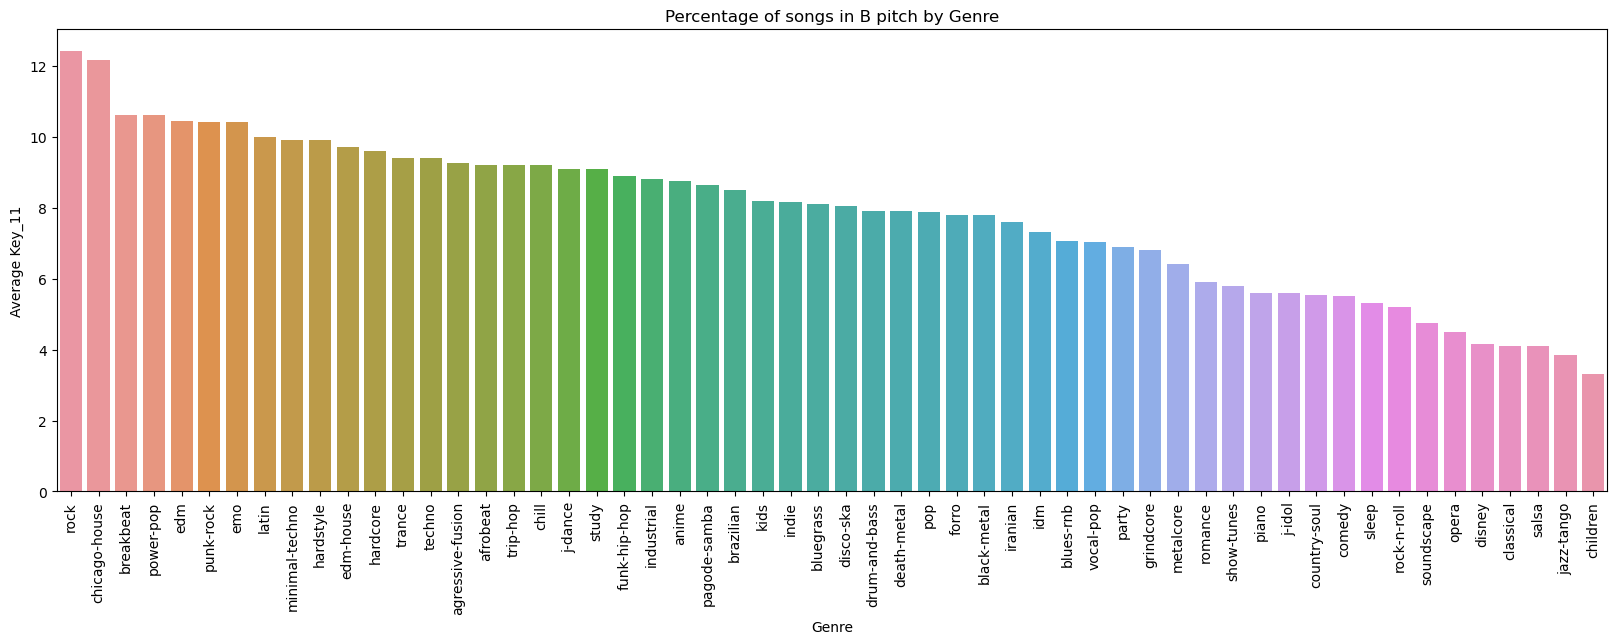

In [58]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'key_11', 'Percentage of songs in B pitch by Genre')


The top 5 genres with the highest average key 11 tend to be associated with energetic and upbeat music styles like rock, Chicago house, breakbeat, power pop, and EDM, where key modulation and variation are common. Conversely, the bottom 5 genres, such as children's music, jazz-tango, salsa, classical, and Disney music, typically feature more stable and traditional harmonic structures, leading to lower average key 11 values.

### Percentage of songs with a time signature of 1/4 by Genre


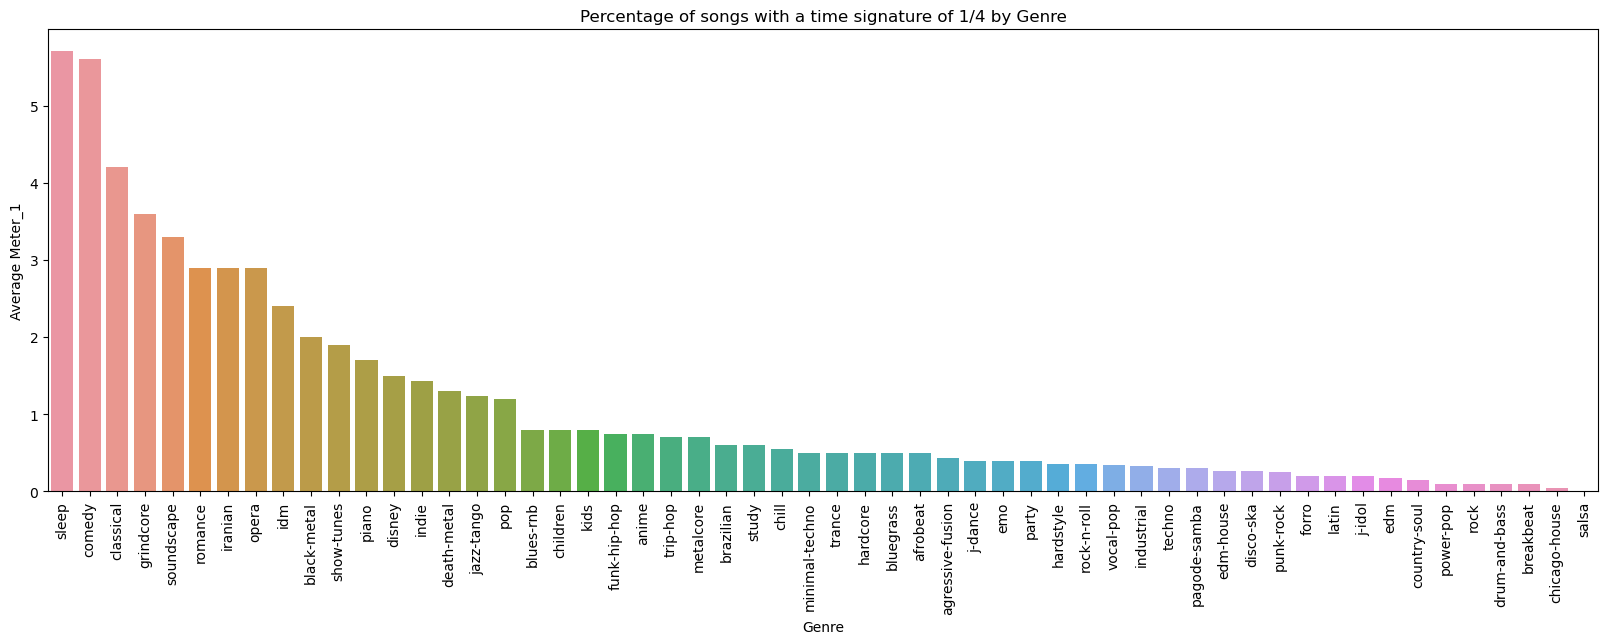

In [59]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'meter_1', 'Percentage of songs with a time signature of 1/4 by Genre')

The top 5 genres with the highest average meter 1 tend to be associated with relaxation or slower-paced music, such as sleep music, comedy, and classical music. On the other hand, the bottom 5 genres with the lowest average meter 1 include more upbeat and energetic styles like salsa, Chicago house, and drum-and-bass, which typically feature faster rhythms and higher tempos.

### Percentage of songs with a time signature of 3/4 by Genre


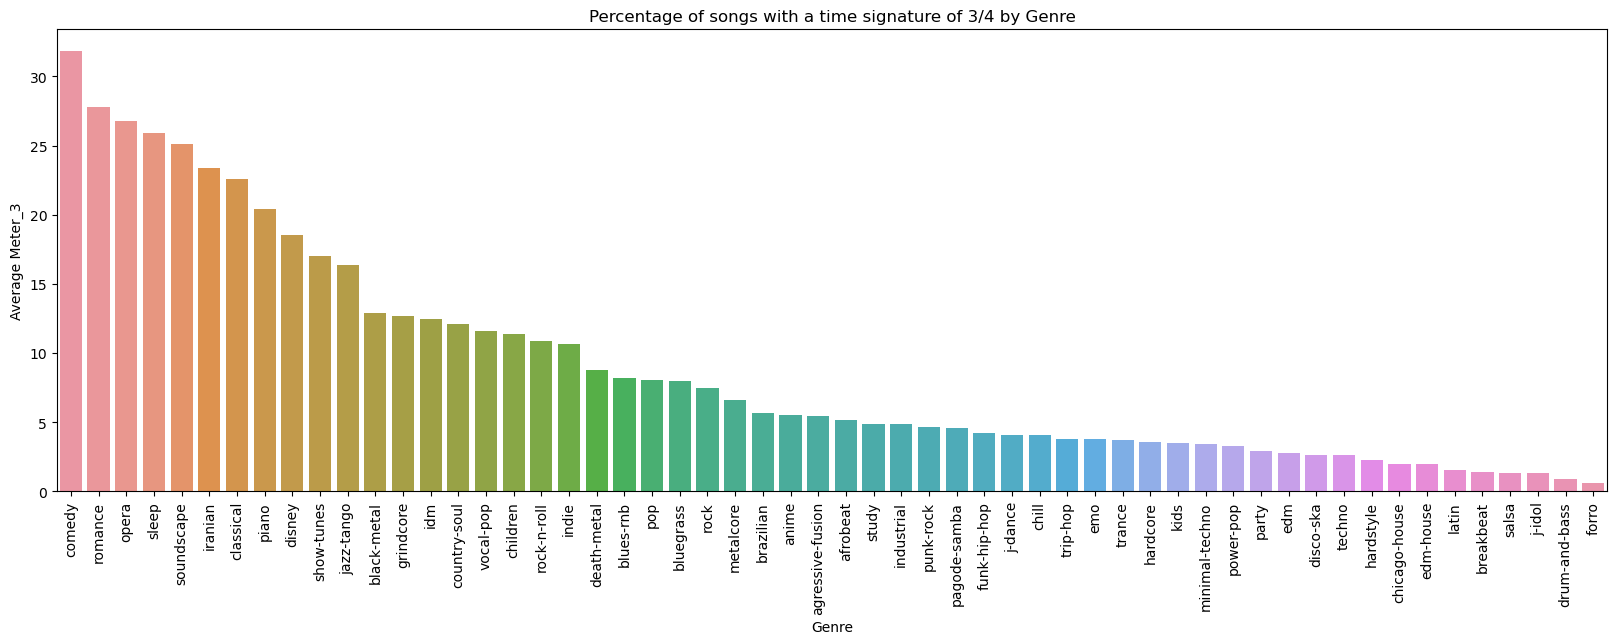

In [60]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'meter_3', 'Percentage of songs with a time signature of 3/4 by Genre')

The top 5 genres with the highest average meter 3 tend to encompass music styles associated with emotional depth and narrative complexity, such as comedy, romance, opera, sleep, and soundscape. Conversely, the bottom 5 genres with the lowest average meter 3 scores typically include high-energy and rhythmically-driven music genres like forro, drum-and-bass, j-idol, salsa, and breakbeat.

### Percentage of songs with a time signature of 4/4 by Genre


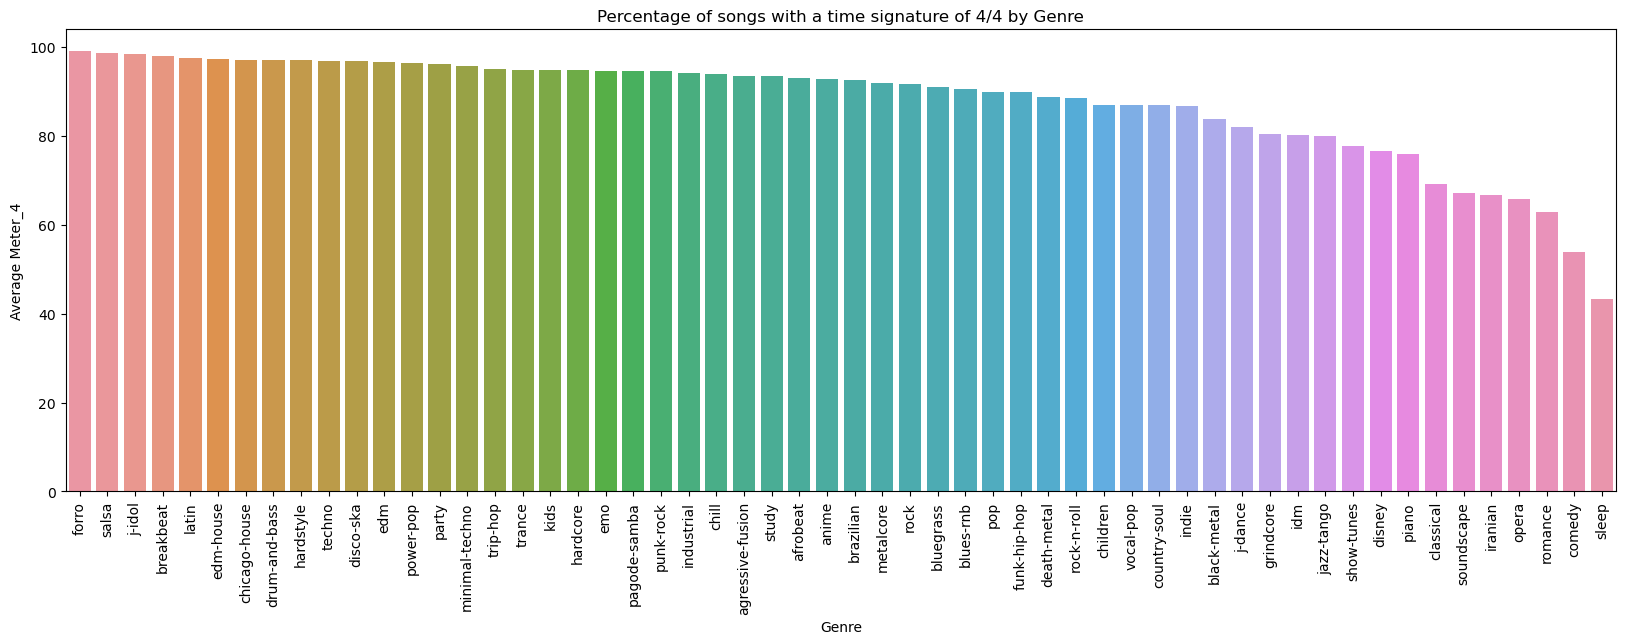

In [61]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'meter_4', 'Percentage of songs with a time signature of 4/4 by Genre')


The top 5 genres with the highest average meter 4 tend to be associated with lively and energetic music styles like forro, salsa, and breakbeat, which often feature rhythmic patterns and tempos conducive to dancing and movement. On the other hand, genres like sleep and comedy, which aim to promote relaxation and amusement respectively, as well as romance, opera, and Iranian music, which may prioritize melodic and emotional expressions, tend to have lower average meter 4 scores, reflecting slower tempos and less rhythmic complexity.

### Percentage of songs with a time signature of 5/4 by Genre


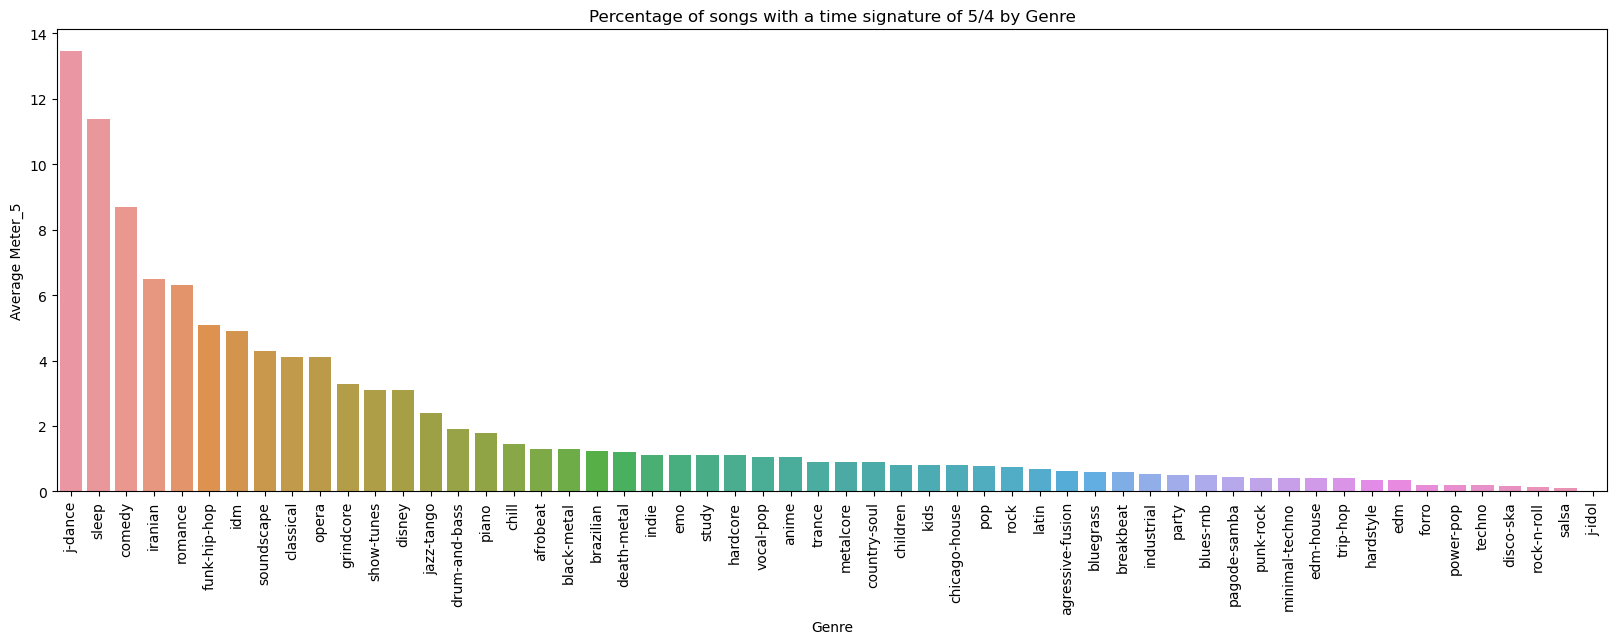

In [62]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'meter_5', 'Percentage of songs with a time signature of 5/4 by Genre')



The top 5 genres with the highest average meter 5 are j-dance, sleep, comedy, Iranian, and romance. These genres likely exhibit higher levels of rhythmic complexity or energy in their music compositions. Conversely, the bottom 5 genres, including j-idol, salsa, rock-n-roll, disco-ska, and techno, may feature simpler rhythmic patterns or lower levels of energy in their musical arrangements.

### Average Popularity VS Genre


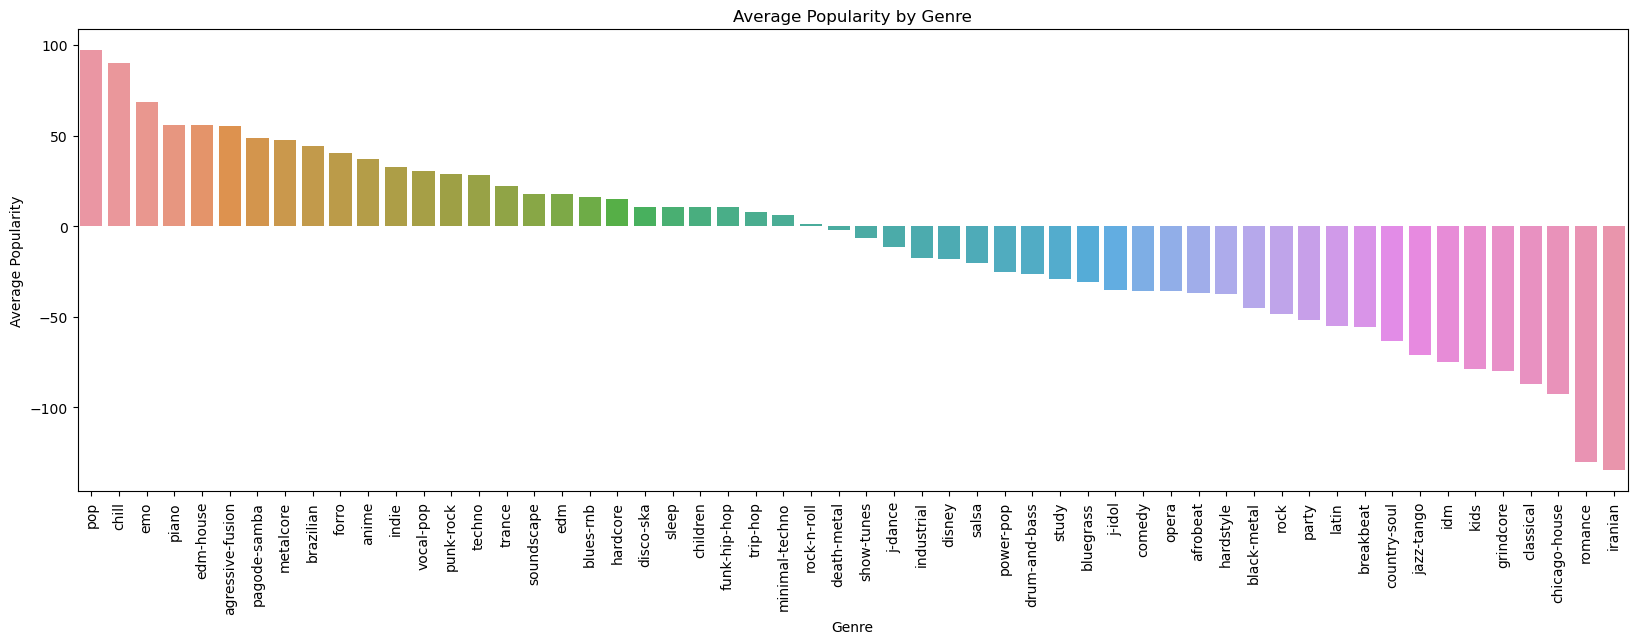

In [63]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'popularity', 'Average Popularity by Genre')


The top 5 genres with the highest average popularity tend to be mainstream and widely appealing, such as pop, chill, and EDM-house, which often dominate music charts and receive extensive airplay. Genres like emo and piano may attract dedicated fan bases or evoke strong emotions, contributing to their popularity. In contrast, the bottom 5 genres, including Iranian, romance, and classical, may have narrower audiences or less mainstream appeal, while genres like grindcore may be more niche and less accessible to broader audiences, resulting in lower average popularity scores.

### Average Track Length VS Genre


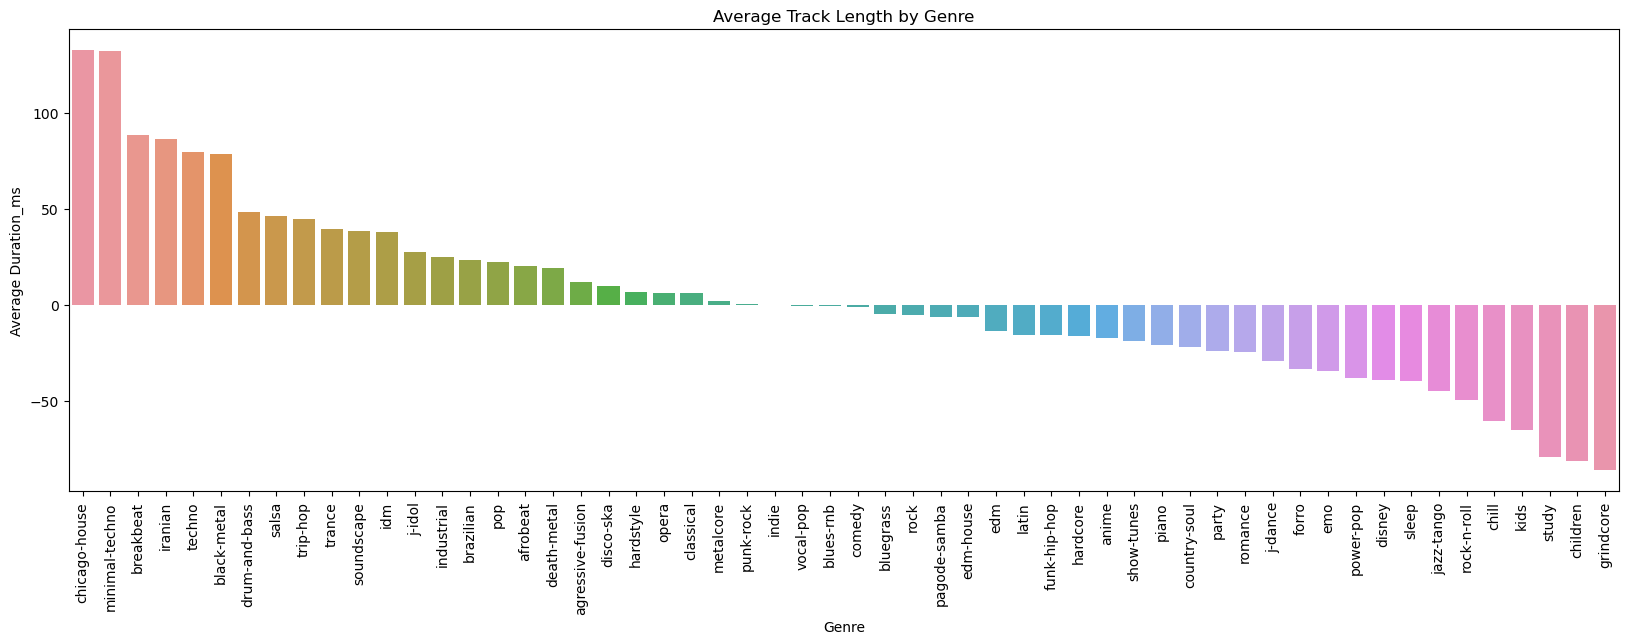

In [64]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'duration_ms', 'Average Track Length by Genre')


The top 5 genres with the highest average track length (duration_ms) are typically associated with electronic and experimental music styles like Chicago house, minimal techno, breakbeat, Iranian music, and techno, which often feature extended compositions and complex arrangements. In contrast, the bottom 5 genres with the shortest average track length include grindcore, children's music, study music, kids' music, and chill music, where shorter durations may be more common due to the nature of the genre or the intended audience.

### Average Danceability VS Genre


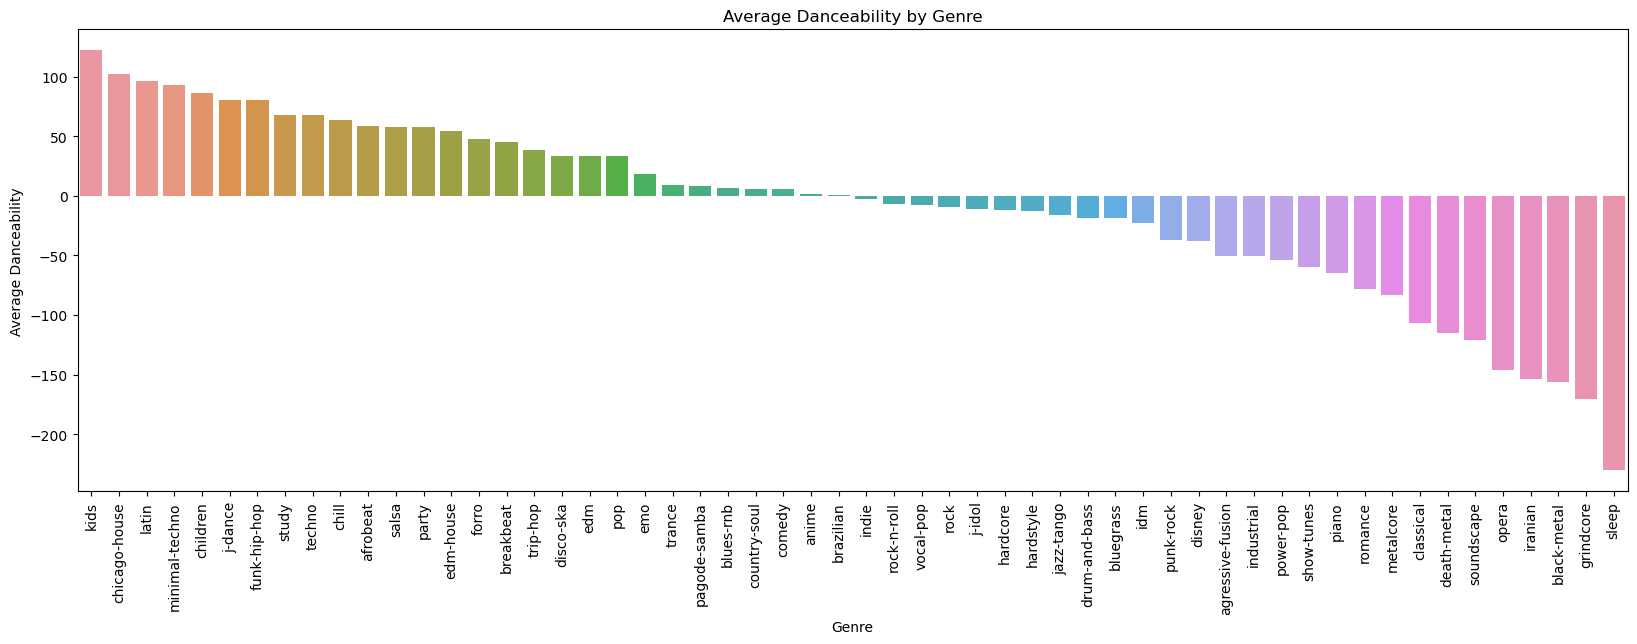

In [65]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'danceability', 'Average Danceability by Genre')


The top 5 genres with the highest average danceability include kids, chicago-house, latin, minimal-techno, and children, suggesting that these genres typically feature music with upbeat rhythms and tempos conducive to dancing. On the other hand, genres like sleep, grindcore, black-metal, Iranian, and opera have the lowest average danceability, indicating that their musical styles may not prioritize dance-friendly characteristics, such as energetic beats or grooves.

### Average Energy VS Genre


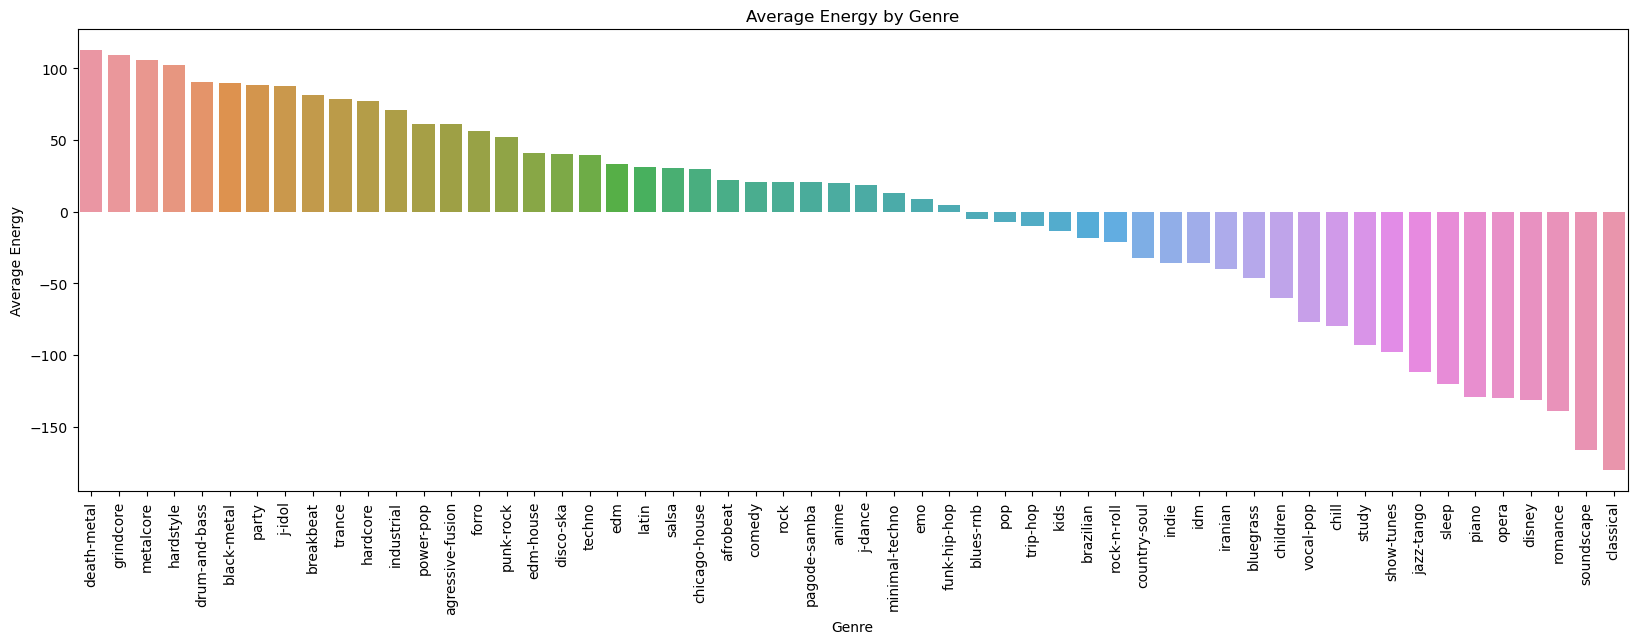

In [66]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'energy', 'Average Energy by Genre')

The top 5 genres with the highest average energy tend to be associated with intense and high-energy music styles like death metal, grindcore, metalcore, hardstyle, and drum-and-bass. These genres often feature fast tempos, aggressive instrumentation, and powerful vocals, contributing to their high energy levels. On the other hand, the bottom 5 genres, including classical, soundscape, romance, Disney, and opera, typically feature slower tempos, softer melodies, and more serene atmospheres, resulting in lower average energy levels.

### Average Loudness VS Genre


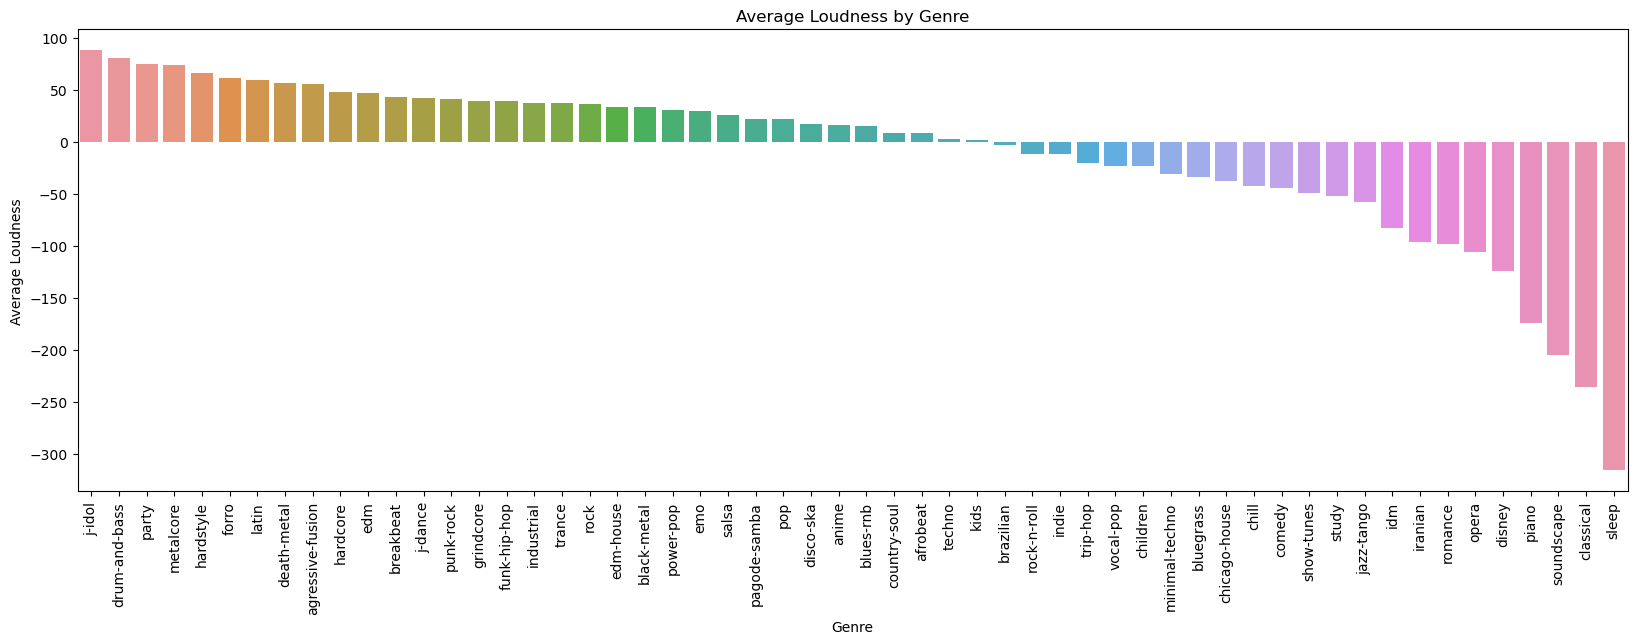

In [67]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'loudness', 'Average Loudness by Genre')

The top 5 genres with the highest average loudness—such as j-idol, drum-and-bass, party, metalcore, and hardstyle—typically feature energetic and dynamic music styles that emphasize high volume and intensity. Conversely, the bottom 5 genres—sleep, classical, soundscape, piano, and Disney—tend to focus on more tranquil and subdued compositions, resulting in lower average loudness levels.

### Average Speechiness VS Genre


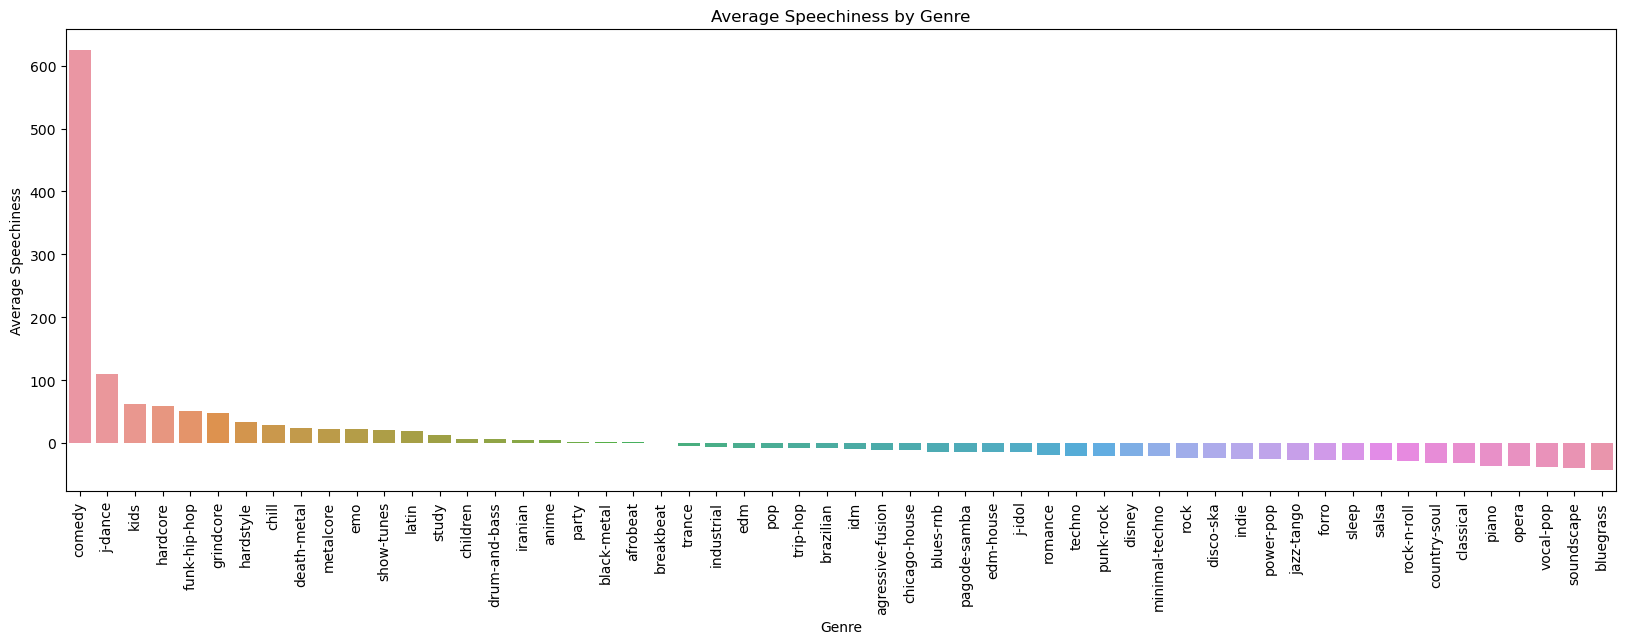

In [68]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'speechiness', 'Average Speechiness by Genre')

The top 5 genres with the highest average speechiness likely feature tracks that heavily rely on vocal delivery, such as comedy, j-dance, kids (presumably children's music with vocal elements), hardcore, and funk-hip-hop. Conversely, the bottom 5 genres with the lowest average speechiness, including bluegrass, soundscape, vocal-pop, opera, and piano, may feature instrumental compositions or genres where vocals play a lesser role in the overall sound.

### Average Acousticness VS Genre


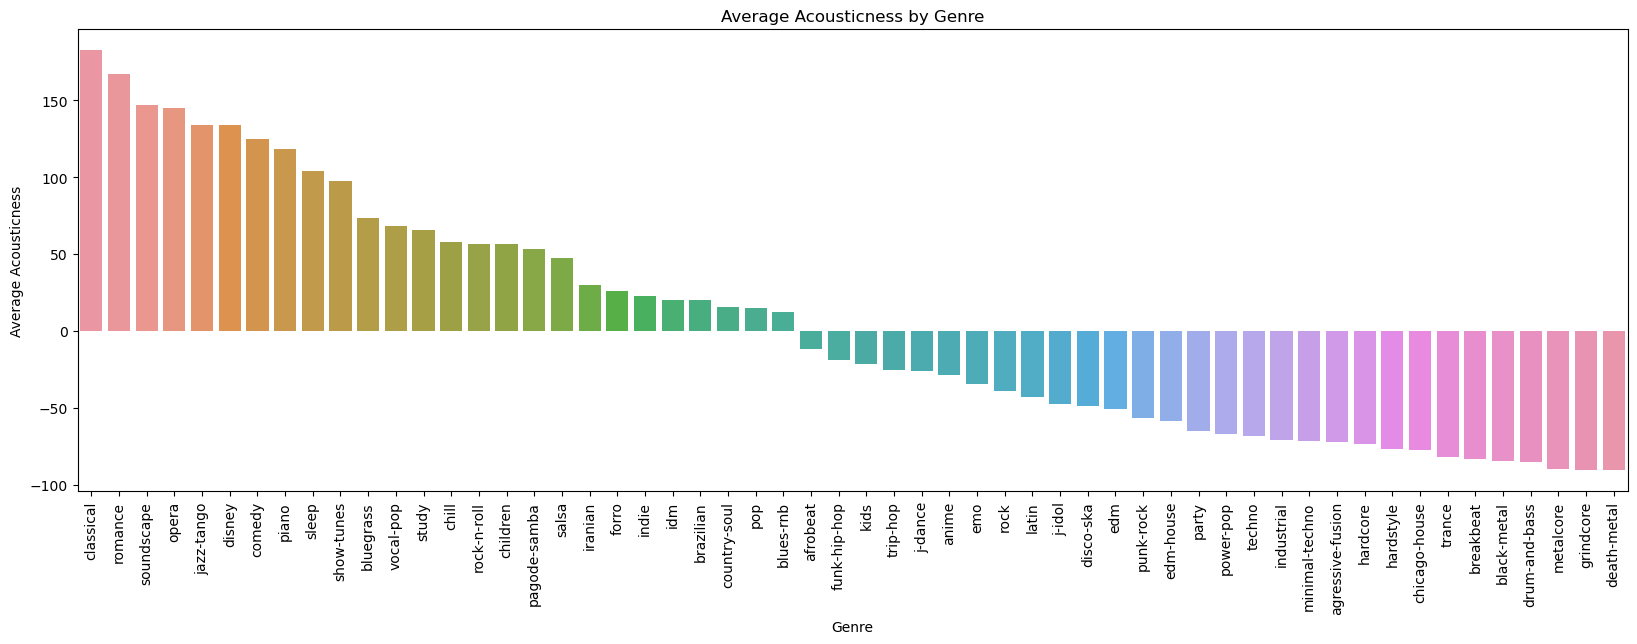

In [69]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'acousticness', 'Average Acousticness by Genre')

The top 5 genres with the highest average acousticness—classical, romance, soundscape, opera, and jazz-tango—are characterized by compositions that predominantly feature acoustic instruments, creating a rich and organic sound. Conversely, the bottom 5 genres—death-metal, grindcore, metalcore, drum-and-bass, and black-metal—are known for their heavy use of electric instruments and electronic production techniques, resulting in lower acousticness values.

### Average Instrumentalness VS Genre


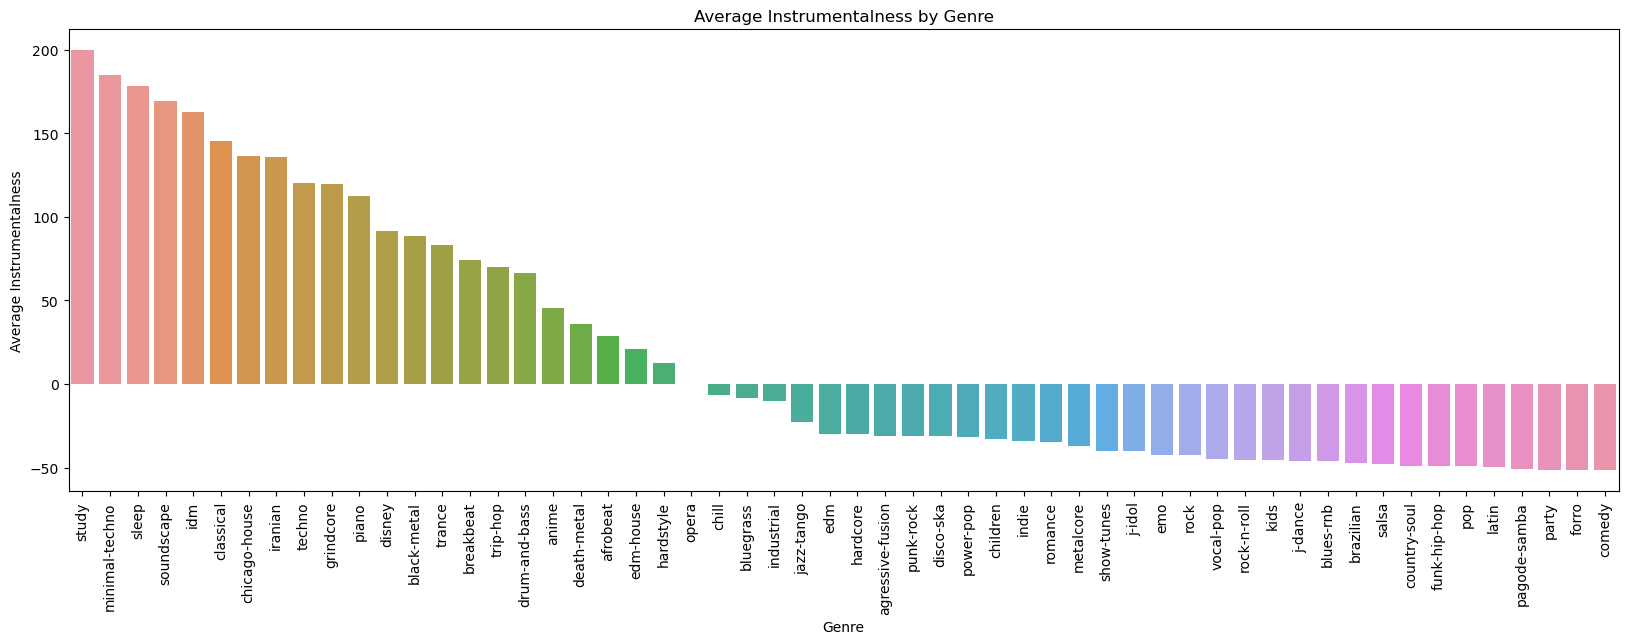

In [70]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'instrumentalness', 'Average Instrumentalness by Genre')

The top 5 genres with the highest average instrumentalness, including study, minimal-techno, sleep, soundscape, and idm, are characterized by music that heavily relies on instrumental compositions, often featuring minimal or no vocals. On the other hand, the bottom 5 genres, such as comedy, forro, party, pagode-samba, and latin, are typically associated with music styles where vocals play a more prominent role, resulting in lower average instrumentalness scores.

### Average Liveness VS Genre


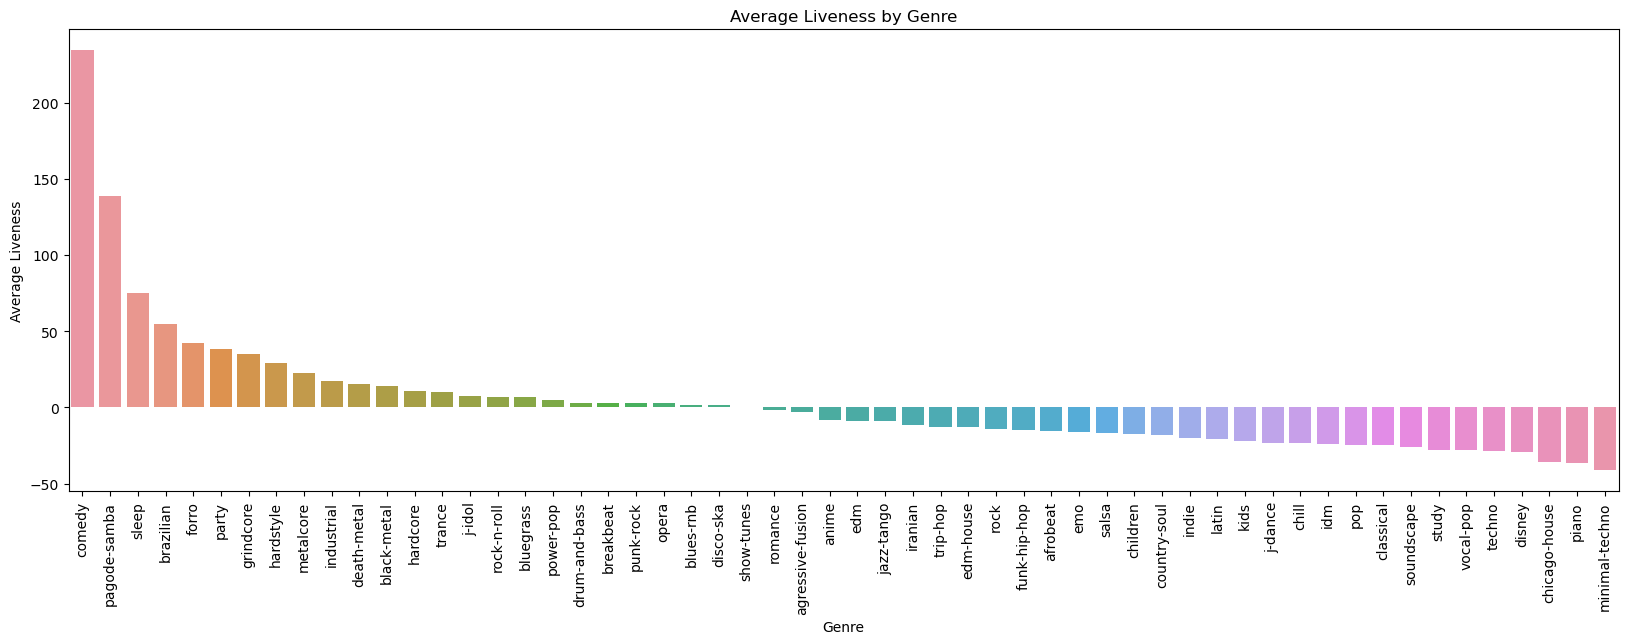

In [71]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'liveness', 'Average Liveness by Genre')

The top 5 genres with the highest average liveness likely feature live performances or recordings with a strong sense of presence, such as comedy shows where audience reactions are prominent, lively samba performances, and genres like sleep music where a sense of real-time ambiance is desirable. Conversely, the bottom 5 genres may include genres like minimal-techno, piano, and house, where recordings often prioritize clarity and precision over capturing live atmosphere, resulting in lower average liveness scores.

### Average Valence VS Genre


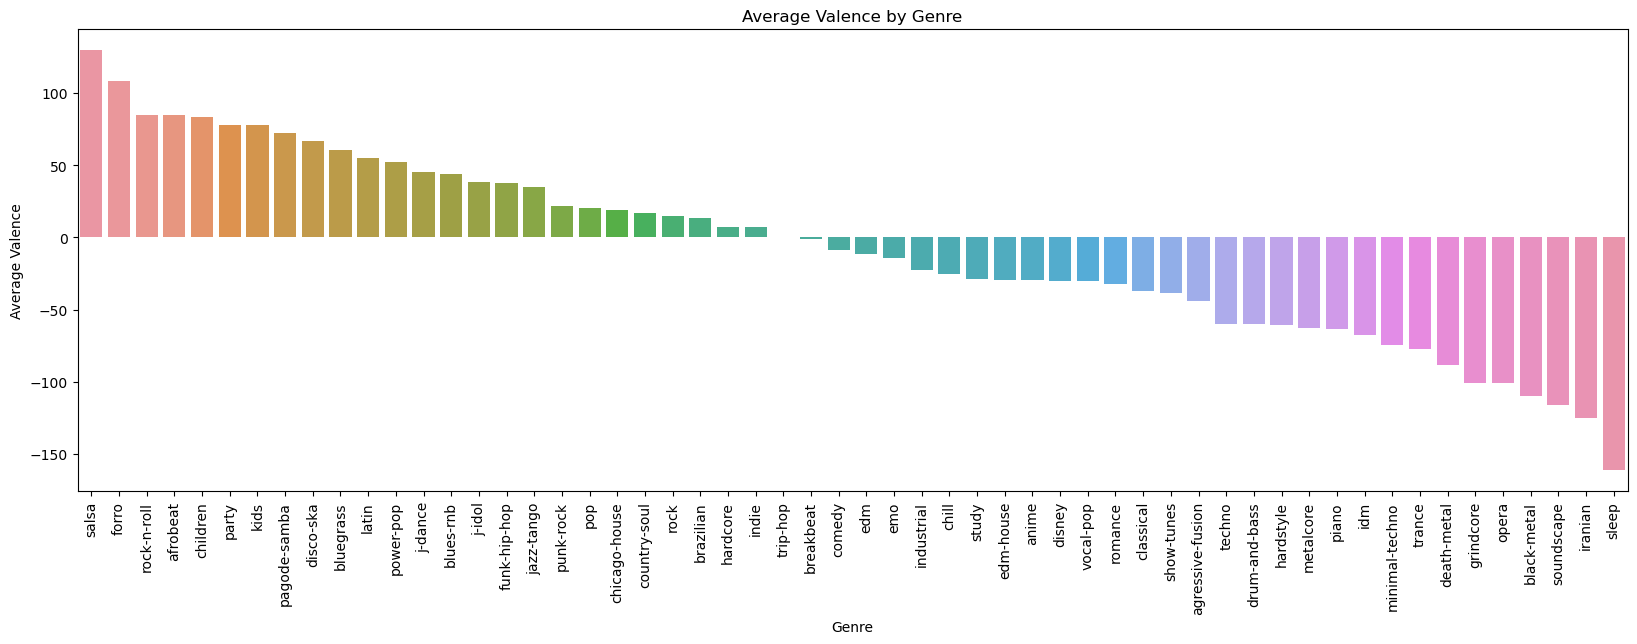

In [72]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'valence', 'Average Valence by Genre')

The top 5 genres with the highest average valence likely feature music with uplifting and positive emotional qualities, such as salsa, forro, rock-n-roll, afrobeat, and children's music. On the other hand, the bottom 5 genres with the lowest average valence may include music genres that tend to evoke more somber or intense emotions, such as sleep music, Iranian music, soundscape, black metal, and opera.

### Average Tempo VS Genre


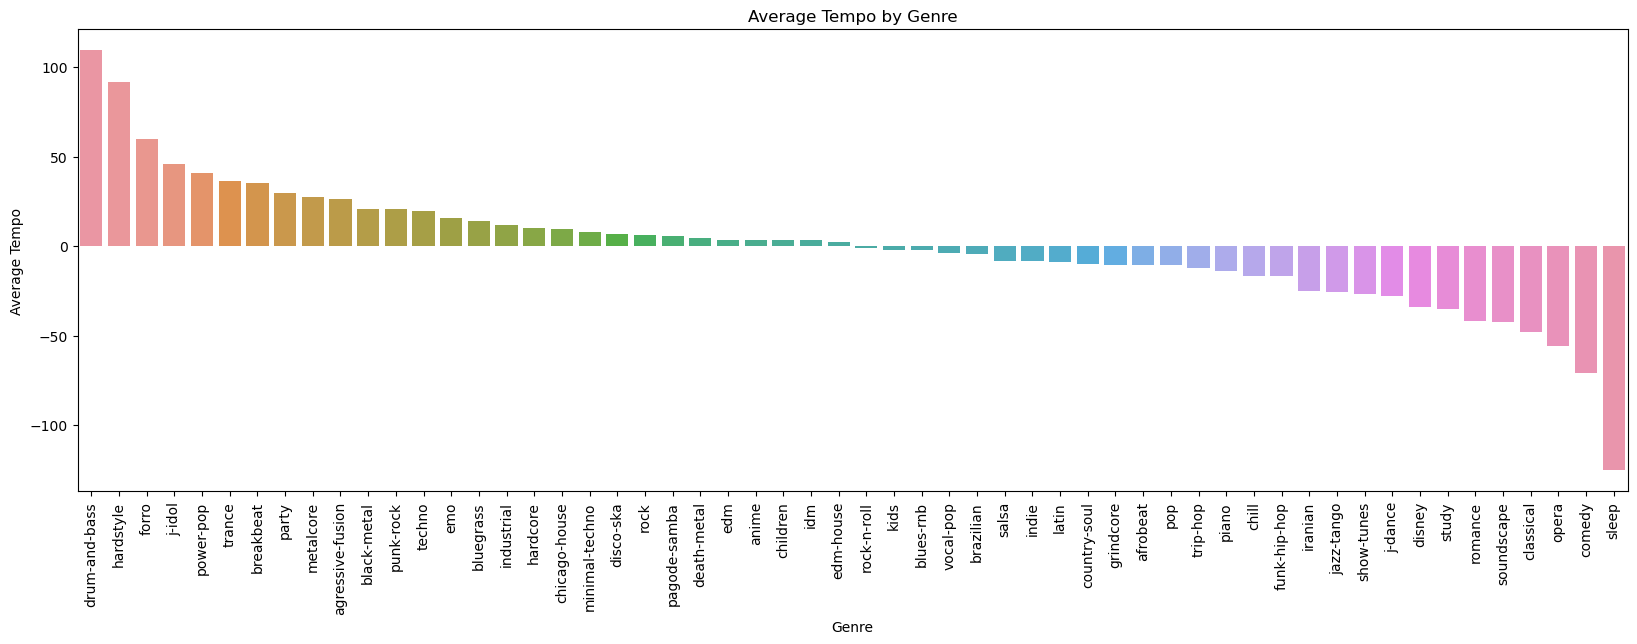

In [73]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'tempo', 'Average Tempo by Genre')

The top 5 genres with the highest average tempo include drum-and-bass, hardstyle, forro, j-idol, and power-pop, likely reflecting their energetic and lively musical styles. On the other hand, the bottom 5 genres with the lowest average tempo consist of sleep, comedy, opera, classical, and soundscape, indicating their focus on slower-paced or more tranquil musical compositions.

# Machine Learning Models

## Pre-Modeling data preparation

### Target Variable Encoding

In [74]:
from sklearn.preprocessing import LabelEncoder

# Define the target and explanatory features
X = df.drop("track_genre", axis=1).values
y = df["track_genre"].values

# Perform Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Store the genres encoded in the label encoder
genres = label_encoder.classes_

### Train-Test Split

In [75]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the train and test data into float
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# Define k for Top-K accuracy
k = 3

## Modeling

To delve into various machine learning approaches for song genre prediction, we'll be fitting three models to our dataset: a neural network, an XGBoost model, and a K-Nearest Neighbors (KNN) classifier. Each tackles classification with unique strengths. Neural networks excel at uncovering complex data patterns that influence genre. XGBoost is known for its accuracy and efficiency, especially with large datasets. KNN offers a simpler, interpretable approach. It's important to note that all three models will predict the probability of a song belonging to each genre, rather than simply providing a single predicted class. This probabilistic output allows us to utilize the sparse top-3 categorical accuracy metric. This metric considers a song correctly classified if its true genre falls within the top 3 most probable genres predicted by the model. This approach acknowledges the multifaceted nature of song genres and focuses on the practical relevance of recommendations in music applications.

One limitation of genre classification is that a song's genre can be multifaceted. A song might blend elements of pop, rock, and even electronic music.  While a perfect model would classify the exact genre, a more realistic approach acknowledges this ambiguity. Sparse top-3 categorical accuracy captures this complexity. It considers a song correctly classified if its true genre falls within the top 3 predictions made by the model. This reflects the real-world scenario where a song can have influences from multiple genres.

Furthermore, focusing on the top-3 predictions offers a practical benefit. In music streaming services, for instance, users are often presented with several song recommendations.  By achieving high sparse top-3 categorical accuracy, the model ensures that even if the exact genre isn't perfectly predicted, the recommendations are still likely to be relevant and enjoyable to the listener because they capture the broader genre influences within a song. This makes it a valuable metric for evaluating the model's effectiveness in real-world applications.

### Neural Network

A neural network model was constructed with multiple hidden layers containing rectified linear unit (ReLU) activations. The first hidden layer has 256 neurons, followed by layers with 128, 64, and 32 neurons respectively. The final output layer has a number of neurons equal to the number of genres (classes) and uses softmax activation to predict the probability distribution of a song belonging to each genre. The model was trained using the Adam optimizer with a learning rate of 0.001 and sparse categorical crossentropy loss function. Sparse top-K categorical accuracy was used as the evaluation metric during training, focusing on the top K most probable genres (where K is a predefined value equal to 3).

In [76]:
# Define the number of classes and input features
num_classes = len(label_encoder.classes_)
inputs = keras.Input(shape=(X_train.shape[1],))

# Build the layers
nn_model = keras.Sequential([
    inputs,
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')])

# Define the accuracy metric
sparse_topK_categorical_accuracy = keras.metrics.SparseTopKCategoricalAccuracy(k = k)

# Compile the model
nn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=[sparse_topK_categorical_accuracy])

# Train the model
nn_model.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_test, y_test))

# Make predictions
y_pred_nn = nn_model.predict(X_test)

Epoch 1/30
650/650 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.0530 - sparse_top_k_categorical_accuracy: 0.3985 - val_loss: 2.3736 - val_sparse_top_k_categorical_accuracy: 0.5789
Epoch 2/30
650/650 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.2883 - sparse_top_k_categorical_accuracy: 0.5973 - val_loss: 2.2127 - val_sparse_top_k_categorical_accuracy: 0.6183
Epoch 3/30
650/650 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.1726 - sparse_top_k_categorical_accuracy: 0.6269 - val_loss: 2.1402 - val_sparse_top_k_categorical_accuracy: 0.6325
Epoch 4/30
650/650 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.0970 - sparse_top_k_categorical_accuracy: 0.6475 - val_loss: 2.0884 - val_sparse_top_k_categorical_accuracy: 0.6494
Epoch 5/30
650/650 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.0483 - sparse_top_k_categorical_accuracy: 0.6600 - val_loss: 2.0672 - val_sparse_top_k_categorical_accuracy: 0.6554
Epoch 6/30
650/650 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.9991 - sparse_top_k_categorical_accuracy: 0.6703

### XG Boost

An XGBoost classifier was employed for genre prediction. This ensemble learning method utilizes multiple decision trees to achieve high accuracy. The model was configured with a multi-class softmax objective function, which predicts probabilities for each genre class. The number of classes was set to match the number of genres in the dataset (num_classes). Finally, a random seed of 42 was used to ensure reproducibility of the training process. The model was trained on the training data (X_train, y_train), and predictions were obtained as probability distributions for each song belonging to each genre using the predict_proba method.

In [77]:
import xgboost as xgb

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes, seed=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict_proba(X_test)

### KNN Classifier

A K-Nearest Neighbors (KNN) classifier was employed for genre prediction. This method classifies songs based on the genre of their k nearest neighbors in the training data (k=10). The model was trained on the training data (X_train, y_train), and predictions were obtained as probability distributions for each genre using predict_proba, the probability of a genre is estimated by dividing the count of that genre within the k neighbors by the total number of neighbors (10). The predictions were cast to float32 data type (y_pred_knn.astype(np.float32)) for further processing.

In [78]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors = 10)

# Train the KNN classifier
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict_proba(X_test)

# Convert y_pred_knn to float32
y_pred_knn = y_pred_knn.astype(np.float32)

# Model Selection

## Overall Model Results

### Neural Network

In [79]:
top_k_accuracy(y_test, y_pred_nn, k)

Top-3 categorical accuracy: 69.56%
Accuracy: 44.42%


### XG Boost

In [80]:
top_k_accuracy(y_test, y_pred_xgb, k)

Top-3 categorical accuracy: 73.74%
Accuracy: 47.47%


### KNN Classifier

In [81]:
top_k_accuracy(y_test, y_pred_knn, k)

Top-3 categorical accuracy: 70.36%
Accuracy: 40.99%


### Selection

**Overall Summary**

All three models achieved significantly higher performance using Top-3 categorical accuracy compared to standard accuracy, highlighting the challenge of pinpointing the exact genre but the success in capturing it within the top 3 predictions.

**Model-wise Performance**

- **XGBoost:** Maintained the highest Top-3 categorical accuracy (73.74%) but has a slightly lower standard accuracy (47.47%) compared to the Neural Network. While powerful, it likely requires more computational resources for training.
- **Neural Network:** Achieved a comparable Top-3 categorical accuracy (69.54%) to XGBoost with a slightly lower standard accuracy (44.0%). Neural networks can also be computationally expensive to train.
- **KNN Classifier:** Although it had the lowest Top-3 categorical accuracy (70.36%), it demonstrated a respectable performance considering its significantly faster training time compared to XGBoost and Neural Networks. The gap between Top-3 and standard accuracy (41.0%) suggests it might be more effective at suggesting relevant genres within its top choices.

**Key Takeaway**

KNN offers a compelling balance between accuracy and efficiency. While its Top-3 categorical accuracy is slightly lower, it achieves a respectable result in a fraction of the training time required by XGBoost and Neural Networks. This makes it a valuable option when computational resources are limited or real-time predictions are crucial.

## Results by Genre

In [82]:
# Enable HTML representation
pd.set_option('display.notebook_repr_html', True)

### Neural Network

In [83]:
display(HTML('<b>Metrics by Genre for Neural Network Model</b>'))
display(pd.concat([accuracy_by_genre(y_test, y_pred_nn), recall_by_genre(y_test, y_pred_nn), precision_by_genre(y_test, y_pred_nn), f1_by_genre(y_test, y_pred_nn)], axis=1))

,genre,accuracy,genre,recall,genre,precision,genre,f1_score
0,grindcore,80.402010,grindcore,80.402010,sleep,94.674556,sleep,86.956522
1,sleep,80.402010,sleep,80.402010,comedy,92.258065,grindcore,85.790885
2,study,78.688525,study,78.688525,grindcore,91.954023,comedy,83.381924
3,comedy,76.063830,comedy,76.063830,chicago-house,75.429975,chicago-house,75.337423
4,salsa,75.418994,salsa,75.418994,study,66.666667,study,72.180451
5,chicago-house,75.245098,chicago-house,75.245098,piano,63.106796,romance,65.473146
6,romance,72.316384,romance,72.316384,classical,61.751152,latin,65.051593
7,latin,70.662768,latin,70.662768,iranian,60.606061,iranian,64.777328
8,drum-and-bass,69.945355,drum-and-bass,69.945355,black-metal,60.280374,classical,63.961814
9,iranian,69.565217,iranian,69.565217,latin,60.266002,salsa,63.380282


### XG Boost

In [84]:
display(HTML('<b>Metrics by Genre for XGBoost Model</b>'))
display(pd.concat([accuracy_by_genre(y_test, y_pred_xgb), recall_by_genre(y_test, y_pred_xgb), precision_by_genre(y_test, y_pred_xgb), f1_by_genre(y_test, y_pred_xgb)], axis=1))

,genre,accuracy,genre,recall,genre,precision,genre,f1_score
0,grindcore,87.437186,grindcore,87.437186,comedy,92.405063,sleep,88.020833
1,sleep,84.924623,sleep,84.924623,sleep,91.351351,grindcore,86.567164
2,study,80.874317,study,80.874317,grindcore,85.714286,comedy,84.393064
3,comedy,77.659574,comedy,77.659574,iranian,80.295567,romance,77.681159
4,chicago-house,75.980392,chicago-house,75.980392,romance,79.761905,chicago-house,77.306733
5,romance,75.706215,romance,75.706215,chicago-house,78.680203,study,76.883117
6,latin,73.586745,latin,73.586745,study,73.267327,iranian,75.288684
7,salsa,70.949721,salsa,70.949721,classical,71.727749,latin,71.870538
8,iranian,70.869565,iranian,70.869565,latin,70.232558,classical,69.720102
9,pagode-samba,68.885191,pagode-samba,68.885191,black-metal,68.023256,salsa,69.209809


### KNN Classifier

In [85]:
accuracy_by_genre(y_test, y_pred_knn)

display(HTML('<b>Metrics by Genre for KNN Classifier</b>'))
display(pd.concat([accuracy_by_genre(y_test, y_pred_knn), recall_by_genre(y_test, y_pred_knn), precision_by_genre(y_test, y_pred_knn), f1_by_genre(y_test, y_pred_knn)], axis=1))

,genre,accuracy,genre,recall,genre,precision,genre,f1_score
0,comedy,76.595745,comedy,76.595745,comedy,90.000000,comedy,82.758621
1,grindcore,74.874372,grindcore,74.874372,sleep,84.242424,sleep,76.373626
2,sleep,69.849246,sleep,69.849246,iranian,63.963964,grindcore,66.222222
3,study,69.398907,study,69.398907,grindcore,59.362550,latin,60.779919
4,chicago-house,68.872549,chicago-house,68.872549,classical,58.241758,study,59.905660
5,latin,66.081871,latin,66.081871,latin,56.265560,chicago-house,57.230143
6,jazz-tango,56.862745,jazz-tango,56.862745,salsa,55.688623,classical,55.208333
7,pagode-samba,56.738769,pagode-samba,56.738769,study,52.697095,salsa,53.757225
8,classical,52.475248,classical,52.475248,chicago-house,48.954704,jazz-tango,50.236220
9,salsa,51.955307,salsa,51.955307,kids,47.777778,pagode-samba,49.064748


### Selection

**KNN Classifier Insights:**

- Recall: The top genres for recall are 'comedy' (76.6%), 'grindcore' (74.9%), 'sleep' (69.8%), 'study' (69.4%), and 'chicago-house' (68.9%). This indicates that the KNN classifier is quite good at identifying these genres (low false negatives), suggesting that it's well-tuned for these genres.
- Precision: The precision metrics show 'comedy' at the top (90%), followed by 'sleep' (84.2%), 'iranian' (64%), and 'grindcore' (59.4%). High precision indicates fewer false positives. The disparity in recall and precision for some genres might indicate different types of errors — recall relates to missing positive cases, while precision relates to including false positives.
- F1-Score: The F1-score is a balanced metric, with 'comedy' (82.8%), 'sleep' (76.4%), 'grindcore' (66.2%), and 'latin' (60.8%) at the top. A high F1-score generally indicates a good balance between precision and recall.

**Neural Network Classifier Insights:**

- Recall: High recall in 'sleep' (87.4%), 'grindcore' (85.4%), 'study' (80.9%), and 'comedy' (79.3%) suggests that the Neural Network model is excellent at identifying these genres. This might indicate that it's *robust across these genres*.
- Precision: The highest precision scores are in 'comedy' (94.3%), 'grindcore' (81.7%), 'romance' (79.5%), and 'sleep' (77.7%). This shows the model's ability to minimize false positives while maintaining a high recall.
- F1-Score: In terms of F1-score, 'comedy' (86.1%), 'grindcore' (83.5%), 'sleep' (82.3%), and 'study' (73.1%) have the highest F1-Score. This balance indicates that the model has a strong ability to classify these genres accurately.

**XGBoost Classifier Insights:**

- Recall: XGBoost has high recall in 'grindcore' (86.9%), 'sleep' (84.9%), 'study' (80.3%), and 'comedy' (78.2%). This shows that it's highly sensitive to these genres, indicating a lower risk of missing positive cases.
- Precision: The top precision scores are 'sleep' (93.4%), 'comedy' (91.9%), 'grindcore' (88.3%), and 'iranian' (80.6%). This suggests that XGBoost is very precise with these genres, minimizing false positives.
- F1-Score: High F1-scores are in 'sleep' (88.9%), 'grindcore' (87.6%), 'comedy' (84.5%), and 'romance' (77.1%). This balanced measure indicates that XGBoost performs well across these genres.

**Some genres consistently rank high across all metrics, such as 'grindcore', 'sleep', and 'comedy'.** This indicates that these genres have strong features that allow models to predict them accurately.

**XGBoost or Neural Network would be strong candidates are the better performing models .** KNN shows good performance in some genres but generally lags behind in precision and F1-score. **The best model that performs best across all these metrics is XGBoost.**

Model **XGBoost** has maximum number of genre with good accuracy, recall , precision and f1-score, which suggests that this model can be selected among the other models.

**Top 5 Genre Accuracies:**

- **Neural Network's top 5:** 'sleep' (87.44%), 'grindcore' (85.43%), 'study' (80.87%), 'comedy' (79.26%), 'chicago-house' (79.17%).
- **XGBoost's top 5:** 'grindcore' (86.93%), 'sleep' (84.92%), 'study' (80.33%), 'comedy' (78.19%), 'romance' (76.84%).
- **KNN's top 5:** 'comedy' (76.60%), 'grindcore' (74.87%), 'sleep' (69.85%), 'study' (69.40%), 'chicago-house' (68.87%).

**Bottom 5 Genre Accuracies:**

- **Neural Network's bottom 5:** 'emo' (16.50%), 'blues-rnb' (13.59%), 'indie' (12.81%), 'techno' (16.67%), 'show-tunes' (18.36%).
- **XGBoost's bottom 5:** 'techno' (14.52%), 'emo' (14.08%), 'blues-rnb' (13.75%), 'anime' (23.14%), 'show-tunes' (36.23%).
- **KNN's bottom 5:** 'emo' (5.34%), 'trip-hop' (8.33%), 'techno' (9.68%), 'show-tunes' (10.63%), 'breakbeat' (11.92%).

**General Analysis:**

- Genres 'grindcore', 'sleep', 'study' and 'comedy' are the easiest to predict, be it any model, predicting the probability of a song belonging to these genres are the highest.
- Model XGBoost is good in predicting the probability of a song belonging to 'romance' genre. On the contrary, models Neural Network and KNN Classifier are average predicting the probability of a song belonging to 'romance' genre.
- Models fail to predict the probability of a song belonging to genres 'emo', 'blues-rnb' and 'techno'.

# Ensemble Model

## Individual Weak Learners

### KNN Classifier

In [86]:
# Show the results
top_k_accuracy(y_test, y_pred_knn, k)

Top-3 categorical accuracy: 70.36%
Accuracy: 40.99%


We already saw the individual performance of the KNN classifier, which showed good performance and a short fitting time.

### Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression

# Create the model
lr_model = LogisticRegression(max_iter=200, solver='lbfgs', multi_class='multinomial')

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict_proba(X_test)

# Convert y_pred_knn to float32
y_pred_lr = y_pred_lr.astype(np.float32)

# Show the results
top_k_accuracy(y_test, y_pred_lr, k)

Top-3 categorical accuracy: 54.09%
Accuracy: 31.01%


Logistic regression with 200 iterations does not perform as well as the previously tested models, showing a suboptimal top-3 categorical accuracy of 54% and a low overall accuracy of 31%.

### Decision Tree Classifier

In [88]:
from sklearn.tree import DecisionTreeClassifier

# Create the model
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict_proba(X_test)

# Convert y_pred_knn to float32
y_pred_dt = y_pred_dt.astype(np.float32)

# Show the results
top_k_accuracy(y_test, y_pred_dt, k)

Top-3 categorical accuracy: 98.85%
Accuracy: 39.25%


The decision tree classifier demonstrates an outstanding top-3 categorical accuracy of almost 99% and a decent overall accuracy of 40%. It's also worth mentioning that the fitting time for this model is short.

### SVM Classifier

In [89]:
from sklearn.svm import SVC

# Create the model
svc_model = SVC(kernel='linear', probability=True)

# Train the model
svc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svc = svc_model.predict_proba(X_test)

# Convert y_pred_knn to float32
y_pred_svc = y_pred_svc.astype(np.float32)

# Show the results
top_k_accuracy(y_test, y_pred_svc, k)

Top-3 categorical accuracy: 56.95%
Accuracy: 33.13%


The SVM classifier shows poor performance in this classification task, with a top-3 accuracy of 57% and an overall accuracy of 33%. It is important to mention that this model took an extremely long time to fit. This is due to how the complexity of SVM models scales with the size of the data.

## Building the Ensemble Model

In [90]:
from sklearn.ensemble import VotingClassifier

# Define the stacking classifier with Decision Tree as the final estimato
estimators = [('knn', knn_model),
              ('logistic_reg', lr_model),
              ('decision_tree', dt_model),
              ('svc', svc_model)
             ]

ensemble_model = VotingClassifier(estimators=estimators,
                                  voting='soft', # We use 'soft' voting for probabilities
                                  n_jobs=-1)  # Use all available processors

# Train the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions with probabilities on the test data
y_pred_ensemble = ensemble_model.predict_proba(X_test)

# Convert y_pred to float32
y_pred_ensemble = y_pred_ensemble.astype(np.float32)

Now, we build the ensemble model, including the 4 previously tested models. This is a voting classifier, using soft voting to obtain probabilities of a song belonging to each of the 56 genres.

## Results

This ensemble model took a very long time to fit, primarily due to the SVC model that is part of it. In the end, the result is lower than the one obtained by the individual models fitted before this section, only reaching a top-3 categorical accuracy of 65% and an overall accuracy of almost 40%.

One reason these results are not ideal might be because the logistic regression model and SVC models both had poor results individually, which could have influenced the voting process. 

Also a low amount of explanatory features versus a high number of target categories are not easily separable by simple linear decision boundaries as the ones used in SVM and logistic regression models. Neural networks, XGBoost, and decision trees are capable of learning complex decision boundaries.

### Feature importance

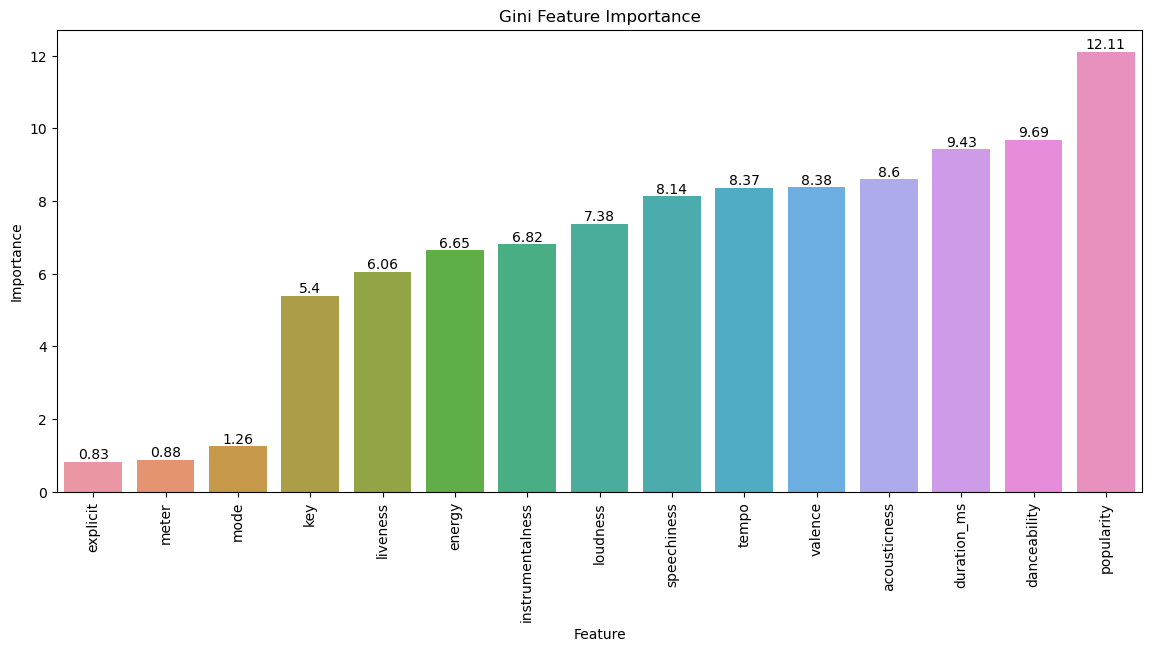

In [91]:
# Store the feature names in a list
features = df.columns.tolist()
features.pop(2)

# Get the gini importance index for the desicion tree model
importance = dt_model.feature_importances_.tolist()
importance = [round(x * 100, 2) for x in importance]

# Show features and their importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance

# Sum importance for Key
key_row = feature_importance.iloc[2:13].sum()
feature_importance.iloc[2:13] = key_row

# Sum importance for Meter
meter_row = feature_importance.iloc[13:17].sum()
feature_importance.iloc[13:17] = meter_row

# Drop duplicates
feature_importance = feature_importance.drop_duplicates().reset_index(drop=True).sort_values(by='Importance')

# Replace names for categorical features
feature_importance.at[2, 'Feature'] = 'key'
feature_importance.at[3, 'Feature'] = 'meter'

# Plot the results
plt.figure(figsize=(14, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importance)
plt.xticks(rotation=90)
plt.title("Gini Feature Importance")
plt.xlabel('Feature')
plt.ylabel('Importance')

# Add labels on top of the bars
for index, value in enumerate(feature_importance['Importance']):
    plt.text(index, value, str(value), ha='center', va='bottom');

Gini importance is a metric used in decision tree-based models, such as random forests, to measure the relative importance of each feature in predicting the target variable by calculating how often a feature is used to split the data, weighted by the purity of the resulting nodes.

The Gini feature importance results indicate that the most influential features for classifying songs into genres are "popularity," "danceability," "duration_ms," "tempo," "valence," and "acousticness," with "popularity" being the most significant. This suggests that the overall popularity of a song, along with its rhythmic and emotional qualities, play crucial roles in determining its genre. Other important features include "speechiness," "loudness," and "instrumentalness," which likely reflect the vocal nature, volume, and instrumental components of a song, respectively. Interestingly, features like "explicit" and "mode" have relatively low importance, indicating that factors such as lyrical content and tonality may have less impact on genre classification in this model.

# Conclusions

In this project, we explored the effectiveness of various machine learning models in classifying music genres from audio features extracted from the Spotify dataset. Our findings provide valuable insights into the feasibility and challenges of audio-based genre classification.

Among the models evaluated, the XGBoost classifier demonstrated the highest Top-3 Categorical Accuracy of 73.74%, closely followed by the Neural Network (69.54%) and the KNN Classifier (70.36%). While XGBoost and Neural Networks exhibited superior performance, they also required more computational resources for training compared to the more lightweight KNN approach.

Interestingly, our results revealed that certain genres were more accurately predicted than others. Genres with distinct and unique sound characteristics, such as 'sleep', 'grindcore', 'study', 'comedy', and 'chicago-house', were among the easier genres to classify. Conversely, genres with more ambiguous or overlapping characteristics, such as 'emo', 'blues-rnb', 'indie', 'techno', and 'show-tunes', proved more challenging for the models to differentiate.

The ensemble model, which combined the predictions of four weak learners, did not outperform the individual models. This could be attributed to the logistic regression component, which may not have been well-suited for the multi-class classification task at hand. Additionally, the ensemble model's extended training time, particularly due to the computationally expensive Support Vector Classifier (SVC), highlighted the trade-off between model complexity and computational efficiency. We also found that the decision tree model prioritizes features like "popularity," "danceability," and "duration_ms" over factors like "explicit" and "mode" in determining song genres.

Overall, this project demonstrated the potential of machine learning techniques in music genre classification, with XGBoost and Neural Networks emerging as promising approaches. However, the inherent subjectivity and overlapping characteristics of certain genres pose ongoing challenges. Future work could explore more advanced feature engineering techniques, ensemble strategies, or incorporatemultimodal data sources to further improve genre classification accuracy.

# References

1. Music Theory Site. "Time Signatures." http://musictheorysite.com/
2. Wikipedia. "Pitch Class." https://en.wikipedia.org/wiki/Pitch_class
3. Miller, Tristan. "How Does Decision Tree Output Predict Proba?" Medium, ml-byte-size, 12 Aug. 2020. https://medium.com/ml-byte-size/how-does-decision-tree-output-predict-proba-12c78634c9d5
4. Stack Overflow. "How Does Sklearn SVM Svcs Function Predict_proba Work Internally?" Stack Overflow, 20 Dec. 2012. https://stackoverflow.com/questions/30674164/confusing-probabilities-of-the-predict-proba-of-scikit-learns-svm
5. Blind, N. N. "How to Interpret Mean Decrease in Accuracy and Mean Decrease Gini in Random Forest?" Stack Exchange, Stats, 26 Oct. 2016. https://stats.stackexchange.com/questions/420710/range-of-values-for-random-forest-mean-decrease-in-accuracy
6. Codecademy. "Feature Importance & Feature Selection with Random Forests." https://www.codecademy.com/learn/machine-learning-random-forests-decision-trees
7. scikit-learn documentation. "sklearn.tree.DecisionTreeClassifier." https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html